In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import fastai
from datetime import datetime
from pandas_datareader.data import DataReader
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.callbacks import EarlyStopping

import yfinance as yf

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_2014 = pd.read_csv('clean/2014_clean')
df_2014.head()

Unnamed: 0 Unnamed: 0.1       Revenue  Revenue Growth  Cost of Revenue  \
0           2           KR  9.837500e+10          0.0182     7.813800e+10   
1           3          RAD  2.552641e+10          0.0053     1.820268e+10   
2           4          GIS  1.790960e+10          0.0076     1.153980e+10   
3           5           PM  8.010600e+10          0.0010     6.077500e+10   
4           6           KO  4.599800e+10         -0.0183     1.788900e+10   

   Gross Profit  R&D Expenses  SG&A Expense  Operating Expenses  \
0  2.023700e+10           0.0  1.519600e+10        1.751200e+10   
1  7.323734e+09           0.0  6.561162e+09        6.586482e+09   
2  6.369800e+09           0.0  3.474300e+09        3.412400e+09   
3  1.933100e+10           0.0  7.001000e+09        7.629000e+09   
4  2.810900e+10           0.0  1.721800e+10        1.840100e+10   

   Operating Income  ...  Receivables growth  Inventory Growth  Asset Growth  \
0      2.725000e+09  ...              0.0618            0.0981        0.1886   
1      7.372520e+08  ...              0.0211           -0.0510       -0.0189   
2      2.957400e+09  ...              0.0257            0.0090        0.0215   
3      1.170200e+10  ...              0.0392           -0.1274       -0.0781   
4      9.708000e+09  ...             -0.0835           -0.0540        0.0219   

   Book Value per Share Growth  Debt Growth  R&D Expense Growth  \
0                       0.3268       0.2738                 0.0   
1                       0.1963      -0.0458                 0.0   
2                       0.0274       0.1025                 0.0   
3                      -0.6769       0.0642                 0.0   
4                      -0.0763       0.1258                 0.0   

   SG&A Expenses Growth              Sector  2015 PRICE VAR [%]  Class  
0                0.0234  Consumer Defensive           33.118297      1  
1               -0.0060  Consumer Defensive            2.752291      1  
2               -0.0220  Consumer Defensive           12.897715      1  
3                0.0161  Consumer Defensive           13.980937      1  
4               -0.0053  Consumer Defensive            5.339413      1  

[5 rows x 226 columns]

In [3]:
df_2014.isna().sum()

Unnamed: 0                0
Unnamed: 0.1              0
Revenue                  24
Revenue Growth          122
Cost of Revenue          37
                       ... 
R&D Expense Growth      128
SG&A Expenses Growth    125
Sector                    0
2015 PRICE VAR [%]        0
Class                     0
Length: 226, dtype: int64

In [4]:
df_2014.isna().sum() / len(df_2014)

Unnamed: 0              0.000000
Unnamed: 0.1            0.000000
Revenue                 0.014688
Revenue Growth          0.074663
Cost of Revenue         0.022644
                          ...   
R&D Expense Growth      0.078335
SG&A Expenses Growth    0.076499
Sector                  0.000000
2015 PRICE VAR [%]      0.000000
Class                   0.000000
Length: 226, dtype: float64

In [5]:
df_2014.duplicated().sum()

0

In [6]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Columns: 226 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(2), object(2)
memory usage: 2.8+ MB


In [7]:
df_2014.head()

Unnamed: 0 Unnamed: 0.1       Revenue  Revenue Growth  Cost of Revenue  \
0           2           KR  9.837500e+10          0.0182     7.813800e+10   
1           3          RAD  2.552641e+10          0.0053     1.820268e+10   
2           4          GIS  1.790960e+10          0.0076     1.153980e+10   
3           5           PM  8.010600e+10          0.0010     6.077500e+10   
4           6           KO  4.599800e+10         -0.0183     1.788900e+10   

   Gross Profit  R&D Expenses  SG&A Expense  Operating Expenses  \
0  2.023700e+10           0.0  1.519600e+10        1.751200e+10   
1  7.323734e+09           0.0  6.561162e+09        6.586482e+09   
2  6.369800e+09           0.0  3.474300e+09        3.412400e+09   
3  1.933100e+10           0.0  7.001000e+09        7.629000e+09   
4  2.810900e+10           0.0  1.721800e+10        1.840100e+10   

   Operating Income  ...  Receivables growth  Inventory Growth  Asset Growth  \
0      2.725000e+09  ...              0.0618            0.0981        0.1886   
1      7.372520e+08  ...              0.0211           -0.0510       -0.0189   
2      2.957400e+09  ...              0.0257            0.0090        0.0215   
3      1.170200e+10  ...              0.0392           -0.1274       -0.0781   
4      9.708000e+09  ...             -0.0835           -0.0540        0.0219   

   Book Value per Share Growth  Debt Growth  R&D Expense Growth  \
0                       0.3268       0.2738                 0.0   
1                       0.1963      -0.0458                 0.0   
2                       0.0274       0.1025                 0.0   
3                      -0.6769       0.0642                 0.0   
4                      -0.0763       0.1258                 0.0   

   SG&A Expenses Growth              Sector  2015 PRICE VAR [%]  Class  
0                0.0234  Consumer Defensive           33.118297      1  
1               -0.0060  Consumer Defensive            2.752291      1  
2               -0.0220  Consumer Defensive           12.897715      1  
3                0.0161  Consumer Defensive           13.980937      1  
4               -0.0053  Consumer Defensive            5.339413      1  

[5 rows x 226 columns]

In [8]:
df_2015 = pd.read_csv('clean/2015_clean')
df_2016 = pd.read_csv('clean/2016_clean')
df_2017 = pd.read_csv('clean/2017_clean')
df_2018 = pd.read_csv('clean/2018_clean', index_col = 1)

df_2018 = df_2018.rename(index = {'Unnamed: 0.1': 'id'})
df_2018.dropna(how = 'all', inplace = True)


In [9]:
df_2015.head()

Unnamed: 0 Unnamed: 0.1       Revenue  Revenue Growth  Cost of Revenue  \
0           0           PG  7.074900e+10         -0.0491     3.705600e+10   
1           3          RAD  2.652838e+10          0.0393     1.895164e+10   
2           4          GIS  1.763030e+10         -0.0156     1.168110e+10   
3           5           PM  7.390800e+10         -0.0774     5.647900e+10   
4           6           KO  4.429400e+10         -0.0370     1.748200e+10   

   Gross Profit  R&D Expenses  SG&A Expense  Operating Expenses  \
0  3.369300e+10           0.0  2.061600e+10        2.264400e+10   
1  7.576732e+09           0.0  6.695642e+09        6.733788e+09   
2  5.949200e+09           0.0  3.328000e+09        3.871900e+09   
3  1.742900e+10           0.0  6.656000e+09        6.806000e+09   
4  2.681200e+10           0.0  1.642700e+10        1.808400e+10   

   Operating Income  ...  Receivables growth  Inventory Growth  Asset Growth  \
0      1.104900e+10  ...             -0.2847           -0.2634       -0.1024   
1      8.429440e+08  ...              0.0336           -0.0371        0.2639   
2      2.077300e+09  ...             -0.0653           -0.0119       -0.0568   
3      1.062300e+10  ...             -0.3062           -0.0139       -0.0350   
4      8.728000e+09  ...             -0.1176           -0.0639       -0.0220   

   Book Value per Share Growth  Debt Growth  R&D Expense Growth  \
0                      -0.1013      -0.1432                 0.0   
1                       1.0266      -0.0344                 0.0   
2                      -0.2118       0.0462                 0.0   
3                      -0.0517      -0.0331                 0.0   
4                      -0.1503       0.0568                 0.0   

   SG&A Expenses Growth              Sector  2016 PRICE VAR [%]  Class  
0               -0.0394  Consumer Defensive           10.809451      1  
1                0.0205  Consumer Defensive            4.303799      1  
2               -0.0421  Consumer Defensive           10.693172      1  
3               -0.0493  Consumer Defensive           10.865590      1  
4               -0.0459  Consumer Defensive            0.958959      1  

[5 rows x 226 columns]

In [10]:
df_2015.isna().sum()


Unnamed: 0                0
Unnamed: 0.1              0
Revenue                  47
Revenue Growth          251
Cost of Revenue         151
                       ... 
R&D Expense Growth      261
SG&A Expenses Growth    257
Sector                    0
2016 PRICE VAR [%]        0
Class                     0
Length: 226, dtype: int64

In [11]:
df_2015.isna().sum() / len(df_2015)

Unnamed: 0              0.000000
Unnamed: 0.1            0.000000
Revenue                 0.016257
Revenue Growth          0.086821
Cost of Revenue         0.052231
                          ...   
R&D Expense Growth      0.090280
SG&A Expenses Growth    0.088897
Sector                  0.000000
2016 PRICE VAR [%]      0.000000
Class                   0.000000
Length: 226, dtype: float64

In [12]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Columns: 226 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(2), object(2)
memory usage: 5.0+ MB


In [13]:
df_2015.duplicated().sum()

0

In [14]:
df_2014 = df_2014.rename(columns = {'Unnamed: 0.1': 'id'})
df_2014.head()

Unnamed: 0   id       Revenue  Revenue Growth  Cost of Revenue  \
0           2   KR  9.837500e+10          0.0182     7.813800e+10   
1           3  RAD  2.552641e+10          0.0053     1.820268e+10   
2           4  GIS  1.790960e+10          0.0076     1.153980e+10   
3           5   PM  8.010600e+10          0.0010     6.077500e+10   
4           6   KO  4.599800e+10         -0.0183     1.788900e+10   

   Gross Profit  R&D Expenses  SG&A Expense  Operating Expenses  \
0  2.023700e+10           0.0  1.519600e+10        1.751200e+10   
1  7.323734e+09           0.0  6.561162e+09        6.586482e+09   
2  6.369800e+09           0.0  3.474300e+09        3.412400e+09   
3  1.933100e+10           0.0  7.001000e+09        7.629000e+09   
4  2.810900e+10           0.0  1.721800e+10        1.840100e+10   

   Operating Income  ...  Receivables growth  Inventory Growth  Asset Growth  \
0      2.725000e+09  ...              0.0618            0.0981        0.1886   
1      7.372520e+08  ...              0.0211           -0.0510       -0.0189   
2      2.957400e+09  ...              0.0257            0.0090        0.0215   
3      1.170200e+10  ...              0.0392           -0.1274       -0.0781   
4      9.708000e+09  ...             -0.0835           -0.0540        0.0219   

   Book Value per Share Growth  Debt Growth  R&D Expense Growth  \
0                       0.3268       0.2738                 0.0   
1                       0.1963      -0.0458                 0.0   
2                       0.0274       0.1025                 0.0   
3                      -0.6769       0.0642                 0.0   
4                      -0.0763       0.1258                 0.0   

   SG&A Expenses Growth              Sector  2015 PRICE VAR [%]  Class  
0                0.0234  Consumer Defensive           33.118297      1  
1               -0.0060  Consumer Defensive            2.752291      1  
2               -0.0220  Consumer Defensive           12.897715      1  
3                0.0161  Consumer Defensive           13.980937      1  
4               -0.0053  Consumer Defensive            5.339413      1  

[5 rows x 226 columns]

In [15]:
df_2015 = df_2015.rename(columns = {'Unnamed: 0.1': 'id'})
df_2015.head()

Unnamed: 0   id       Revenue  Revenue Growth  Cost of Revenue  \
0           0   PG  7.074900e+10         -0.0491     3.705600e+10   
1           3  RAD  2.652838e+10          0.0393     1.895164e+10   
2           4  GIS  1.763030e+10         -0.0156     1.168110e+10   
3           5   PM  7.390800e+10         -0.0774     5.647900e+10   
4           6   KO  4.429400e+10         -0.0370     1.748200e+10   

   Gross Profit  R&D Expenses  SG&A Expense  Operating Expenses  \
0  3.369300e+10           0.0  2.061600e+10        2.264400e+10   
1  7.576732e+09           0.0  6.695642e+09        6.733788e+09   
2  5.949200e+09           0.0  3.328000e+09        3.871900e+09   
3  1.742900e+10           0.0  6.656000e+09        6.806000e+09   
4  2.681200e+10           0.0  1.642700e+10        1.808400e+10   

   Operating Income  ...  Receivables growth  Inventory Growth  Asset Growth  \
0      1.104900e+10  ...             -0.2847           -0.2634       -0.1024   
1      8.429440e+08  ...              0.0336           -0.0371        0.2639   
2      2.077300e+09  ...             -0.0653           -0.0119       -0.0568   
3      1.062300e+10  ...             -0.3062           -0.0139       -0.0350   
4      8.728000e+09  ...             -0.1176           -0.0639       -0.0220   

   Book Value per Share Growth  Debt Growth  R&D Expense Growth  \
0                      -0.1013      -0.1432                 0.0   
1                       1.0266      -0.0344                 0.0   
2                      -0.2118       0.0462                 0.0   
3                      -0.0517      -0.0331                 0.0   
4                      -0.1503       0.0568                 0.0   

   SG&A Expenses Growth              Sector  2016 PRICE VAR [%]  Class  
0               -0.0394  Consumer Defensive           10.809451      1  
1                0.0205  Consumer Defensive            4.303799      1  
2               -0.0421  Consumer Defensive           10.693172      1  
3               -0.0493  Consumer Defensive           10.865590      1  
4               -0.0459  Consumer Defensive            0.958959      1  

[5 rows x 226 columns]

In [16]:
df_2016 = df_2016.rename(columns = {'Unnamed: 0.1': 'id'})
df_2017 = df_2017.rename(columns = {'Unnamed: 0.1': 'id'})


In [17]:
merged = pd.merge(df_2014, df_2015, on = 'id', how = 'inner')

In [18]:
merged.head()

Unnamed: 0_x    id     Revenue_x  Revenue Growth_x  Cost of Revenue_x  \
0             3   RAD  2.552641e+10            0.0053       1.820268e+10   
1             4   GIS  1.790960e+10            0.0076       1.153980e+10   
2             5    PM  8.010600e+10            0.0010       6.077500e+10   
3             6    KO  4.599800e+10           -0.0183       1.788900e+10   
4             8  MDLZ  3.424400e+10           -0.0299       2.164700e+10   

   Gross Profit_x  R&D Expenses_x  SG&A Expense_x  Operating Expenses_x  \
0    7.323734e+09             0.0    6.561162e+09          6.586482e+09   
1    6.369800e+09             0.0    3.474300e+09          3.412400e+09   
2    1.933100e+10             0.0    7.001000e+09          7.629000e+09   
3    2.810900e+10             0.0    1.721800e+10          1.840100e+10   
4    1.259700e+10             0.0    8.457000e+09          9.355000e+09   

   Operating Income_x  ...  Receivables growth_y  Inventory Growth_y  \
0        7.372520e+08  ...                0.0336             -0.0371   
1        2.957400e+09  ...               -0.0653             -0.0119   
2        1.170200e+10  ...               -0.3062             -0.0139   
3        9.708000e+09  ...               -0.1176             -0.0639   
4        3.242000e+09  ...               -0.1905             -0.2503   

   Asset Growth_y  Book Value per Share Growth_y  Debt Growth_y  \
0          0.2639                         1.0266        -0.0344   
1         -0.0568                        -0.2118         0.0462   
2         -0.0350                        -0.0517        -0.0331   
3         -0.0220                        -0.1503         0.0568   
4         -0.0588                         0.0671        -0.0755   

   R&D Expense Growth_y  SG&A Expenses Growth_y            Sector_y  \
0                   0.0                  0.0205  Consumer Defensive   
1                   0.0                 -0.0421  Consumer Defensive   
2                   0.0                 -0.0493  Consumer Defensive   
3                   0.0                 -0.0459  Consumer Defensive   
4                   0.0                 -0.1041  Consumer Defensive   

   2016 PRICE VAR [%]  Class_y  
0            4.303799        1  
1           10.693172        1  
2           10.865590        1  
3            0.958959        1  
4            2.976629        1  

[5 rows x 451 columns]

In [20]:
merged.isna().sum()


Unnamed: 0_x               0
id                         0
Revenue_x                 18
Revenue Growth_x          82
Cost of Revenue_x         28
                          ..
R&D Expense Growth_y      59
SG&A Expenses Growth_y    55
Sector_y                   0
2016 PRICE VAR [%]         0
Class_y                    0
Length: 451, dtype: int64

In [21]:
merged.isna().sum() / len(merged)

Unnamed: 0_x              0.000000
id                        0.000000
Revenue_x                 0.015776
Revenue Growth_x          0.071867
Cost of Revenue_x         0.024540
                            ...   
R&D Expense Growth_y      0.051709
SG&A Expenses Growth_y    0.048203
Sector_y                  0.000000
2016 PRICE VAR [%]        0.000000
Class_y                   0.000000
Length: 451, dtype: float64

In [22]:
df_2014.head()

Unnamed: 0   id       Revenue  Revenue Growth  Cost of Revenue  \
0           2   KR  9.837500e+10          0.0182     7.813800e+10   
1           3  RAD  2.552641e+10          0.0053     1.820268e+10   
2           4  GIS  1.790960e+10          0.0076     1.153980e+10   
3           5   PM  8.010600e+10          0.0010     6.077500e+10   
4           6   KO  4.599800e+10         -0.0183     1.788900e+10   

   Gross Profit  R&D Expenses  SG&A Expense  Operating Expenses  \
0  2.023700e+10           0.0  1.519600e+10        1.751200e+10   
1  7.323734e+09           0.0  6.561162e+09        6.586482e+09   
2  6.369800e+09           0.0  3.474300e+09        3.412400e+09   
3  1.933100e+10           0.0  7.001000e+09        7.629000e+09   
4  2.810900e+10           0.0  1.721800e+10        1.840100e+10   

   Operating Income  ...  Receivables growth  Inventory Growth  Asset Growth  \
0      2.725000e+09  ...              0.0618            0.0981        0.1886   
1      7.372520e+08  ...              0.0211           -0.0510       -0.0189   
2      2.957400e+09  ...              0.0257            0.0090        0.0215   
3      1.170200e+10  ...              0.0392           -0.1274       -0.0781   
4      9.708000e+09  ...             -0.0835           -0.0540        0.0219   

   Book Value per Share Growth  Debt Growth  R&D Expense Growth  \
0                       0.3268       0.2738                 0.0   
1                       0.1963      -0.0458                 0.0   
2                       0.0274       0.1025                 0.0   
3                      -0.6769       0.0642                 0.0   
4                      -0.0763       0.1258                 0.0   

   SG&A Expenses Growth              Sector  2015 PRICE VAR [%]  Class  
0                0.0234  Consumer Defensive           33.118297      1  
1               -0.0060  Consumer Defensive            2.752291      1  
2               -0.0220  Consumer Defensive           12.897715      1  
3                0.0161  Consumer Defensive           13.980937      1  
4               -0.0053  Consumer Defensive            5.339413      1  

[5 rows x 226 columns]

In [23]:
df_2014.describe()

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  \
count  1634.000000  1.610000e+03     1512.000000     1.597000e+03   
mean   1994.049572  5.149501e+09        0.375206     3.150510e+09   
std    1120.229651  1.725191e+10        3.507014     1.286640e+10   
min       2.000000 -9.200000e+07       -1.000000    -3.700000e+04   
25%     999.250000  6.051825e+07        0.002450     0.000000e+00   
50%    2086.500000  4.222170e+08        0.070700     1.250140e+08   
75%    2981.750000  2.243422e+09        0.187275     1.058623e+09   
max    3806.000000  2.497173e+11       93.589700     2.021805e+11   

       Gross Profit  R&D Expenses  SG&A Expense  Operating Expenses  \
count  1.602000e+03  1.566000e+03  1.599000e+03        1.604000e+03   
mean   1.987876e+09  1.083047e+08  9.358461e+08        1.300108e+09   
std    7.133146e+09  7.212341e+08  3.557919e+09        4.801045e+09   
min   -1.105000e+09  0.000000e+00  0.000000e+00       -3.220100e+07   
25%    3.985289e+07  0.000000e+00  1.961022e+07        3.540320e+07   
50%    2.016400e+08  0.000000e+00  8.300000e+07        1.433275e+08   
75%    8.874282e+08  8.866753e+06  3.985520e+08        5.842930e+08   
max    9.511200e+10  1.138100e+10  5.012800e+10        6.127400e+10   

       Operating Income  Interest Expense  ...  \
count      1.609000e+03      1.606000e+03  ...   
mean       6.921242e+08      7.441894e+07  ...   
std        3.115739e+09      3.000383e+08  ...   
min       -2.567200e+09     -7.090000e+07  ...   
25%        2.598709e+06      0.000000e+00  ...   
50%        4.583000e+07      2.017411e+06  ...   
75%        2.749340e+08      3.810500e+07  ...   
max        5.863923e+10      4.915000e+09  ...   

       3Y Dividend per Share Growth (per Share)  Receivables growth  \
count                               1363.000000         1481.000000   
mean                                   0.054233            6.799729   
std                                    0.279481          242.592340   
min                                   -1.000000           -1.000000   
25%                                    0.000000           -0.020000   
50%                                    0.000000            0.000000   
75%                                    0.070400            0.169900   
max                                    3.605800         9328.200000   

       Inventory Growth  Asset Growth  Book Value per Share Growth  \
count       1481.000000   1481.000000                  1453.000000   
mean           0.070564      0.658582                     0.249750   
std            0.510524      7.362976                     3.780447   
min           -1.000000     -0.946000                   -64.500000   
25%            0.000000      0.002200                    -0.051500   
50%            0.000000      0.066900                     0.048400   
75%            0.050400      0.206500                     0.144200   
max           14.591100    197.343400                   104.066700   

       Debt Growth  R&D Expense Growth  SG&A Expenses Growth  \
count  1475.000000         1506.000000           1509.000000   
mean      1.057281            1.121345              0.398579   
std      12.955341           39.751637              6.134226   
min      -1.051000           -1.000000             -0.832900   
25%      -0.042100            0.000000              0.003600   
50%       0.000000            0.000000              0.071500   
75%       0.279000            0.000000              0.208000   
max     444.268700         1542.611000            225.690000   

       2015 PRICE VAR [%]   Class  
count        1.634000e+03  1634.0  
mean         2.311538e+03     1.0  
std          6.255261e+04     0.0  
min          0.000000e+00     1.0  
25%          7.343882e+00     1.0  
50%          1.654599e+01     1.0  
75%          3.434627e+01     1.0  
max          2.418601e+06     1.0  

[8 rows x 224 columns]

In [24]:
df_2014.corr()

Unnamed: 0   Revenue  Revenue Growth  Cost of Revenue  \
Unnamed: 0              1.000000 -0.123425       -0.045458        -0.121499   
Revenue                -0.123425  1.000000       -0.026049         0.928179   
Revenue Growth         -0.045458 -0.026049        1.000000        -0.021434   
Cost of Revenue        -0.121499  0.928179       -0.021434         1.000000   
Gross Profit           -0.080306  0.741327       -0.025060         0.438299   
...                          ...       ...             ...              ...   
Debt Growth            -0.011858 -0.016416        0.002989        -0.013018   
R&D Expense Growth     -0.026417 -0.008050       -0.002332        -0.006601   
SG&A Expenses Growth   -0.011540 -0.015021        0.062151        -0.012358   
2015 PRICE VAR [%]      0.009858 -0.010225        0.155540        -0.008339   
Class                        NaN       NaN             NaN              NaN   

                      Gross Profit  R&D Expenses  SG&A Expense  \
Unnamed: 0               -0.080306     -0.012427     -0.089998   
Revenue                   0.741327      0.316781      0.727187   
Revenue Growth           -0.025060     -0.007657     -0.024217   
Cost of Revenue           0.438299      0.186557      0.473345   
Gross Profit              1.000000      0.432059      0.903154   
...                            ...           ...           ...   
Debt Growth              -0.016767     -0.001082     -0.016415   
R&D Expense Growth       -0.007788     -0.002945     -0.007349   
SG&A Expenses Growth     -0.014445     -0.007014     -0.013738   
2015 PRICE VAR [%]       -0.009721     -0.005411     -0.009127   
Class                          NaN           NaN           NaN   

                      Operating Expenses  Operating Income  Interest Expense  \
Unnamed: 0                     -0.064523         -0.084717         -0.076887   
Revenue                         0.707633          0.609065          0.539067   
Revenue Growth                 -0.024046         -0.023711         -0.020731   
Cost of Revenue                 0.427822          0.344031          0.373688   
Gross Profit                    0.937730          0.844253          0.627431   
...                                  ...               ...               ...   
Debt Growth                    -0.015712         -0.016621         -0.016314   
R&D Expense Growth             -0.007384         -0.007549         -0.007174   
SG&A Expenses Growth           -0.013488         -0.014418         -0.011099   
2015 PRICE VAR [%]             -0.008833         -0.008656         -0.007524   
Class                                NaN               NaN               NaN   

                      ...  3Y Dividend per Share Growth (per Share)  \
Unnamed: 0            ...                                  0.002379   
Revenue               ...                                  0.082967   
Revenue Growth        ...                                 -0.016678   
Cost of Revenue       ...                                  0.071403   
Gross Profit          ...                                  0.073817   
...                   ...                                       ...   
Debt Growth           ...                                 -0.004027   
R&D Expense Growth    ...                                 -0.035220   
SG&A Expenses Growth  ...                                  0.010741   
2015 PRICE VAR [%]    ...                                 -0.011816   
Class                 ...                                       NaN   

                      Receivables growth  Inventory Growth  Asset Growth  \
Unnamed: 0                     -0.030511         -0.072853     -0.028124   
Revenue                        -0.008065         -0.022297     -0.023479   
Revenue Growth                  0.005811          0.173670      0.024823   
Cost of Revenue                -0.006642         -0.016919     -0.019137   
Gross Profit                   -0.007731         -0.024037     -0.022888   
...       

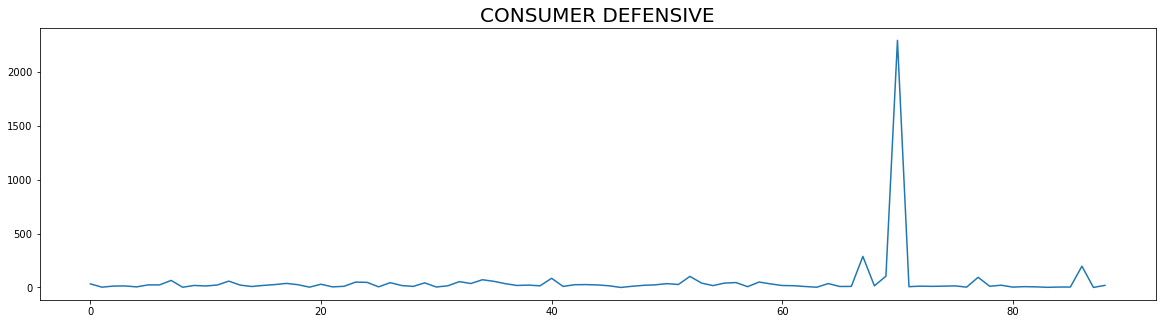

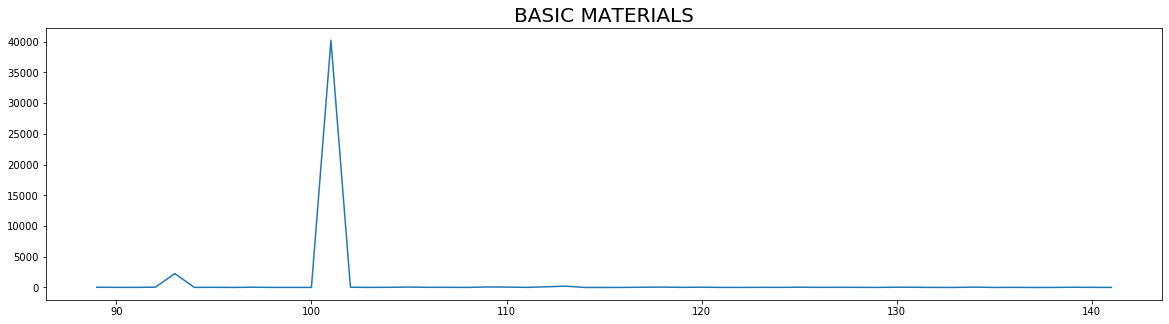

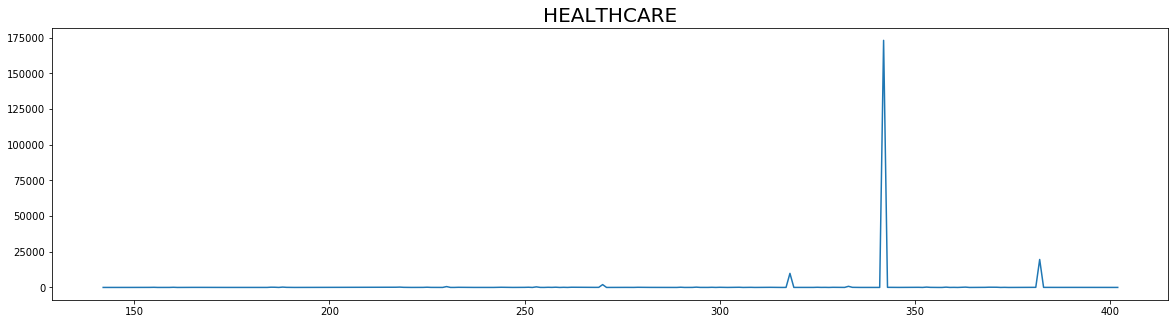

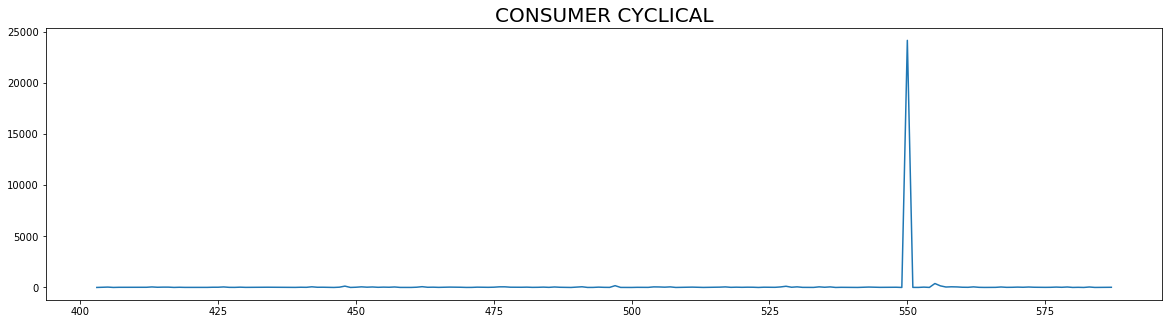

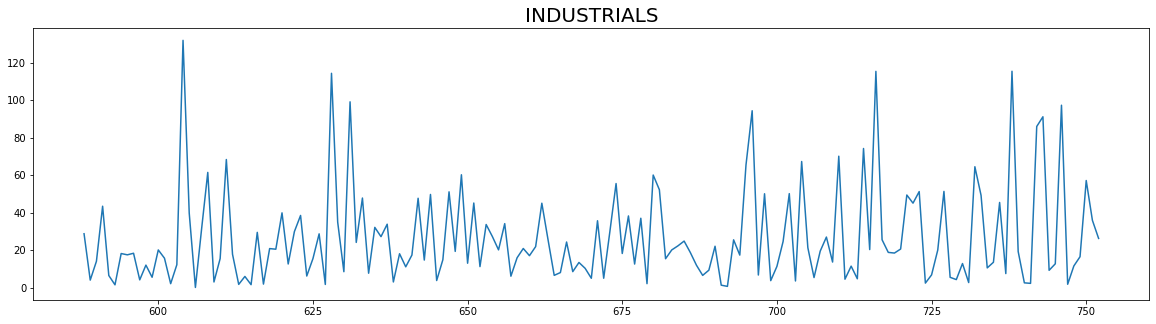

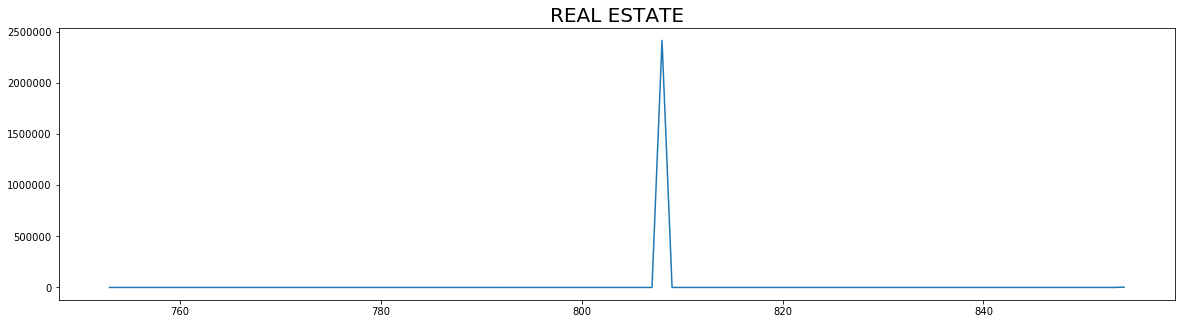

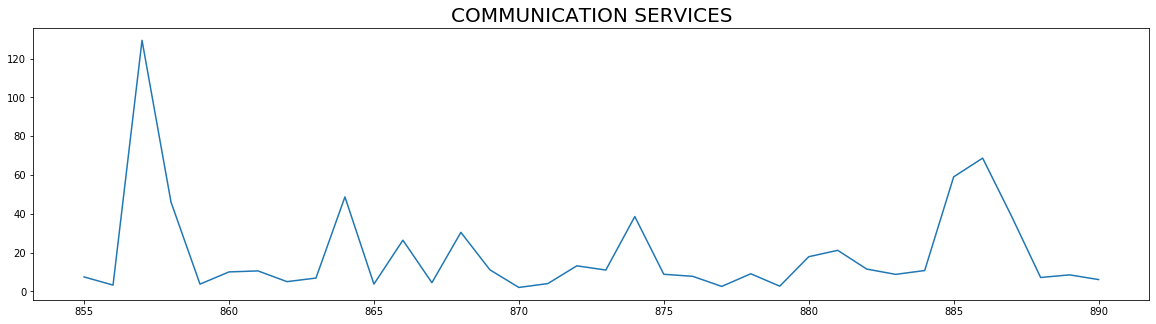

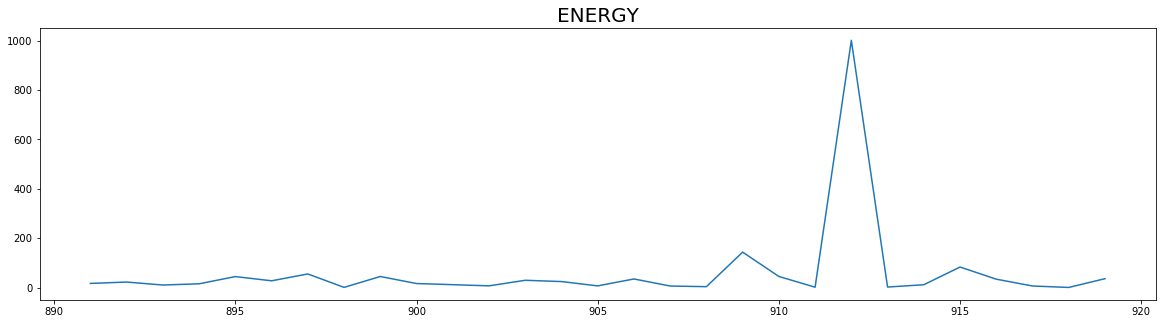

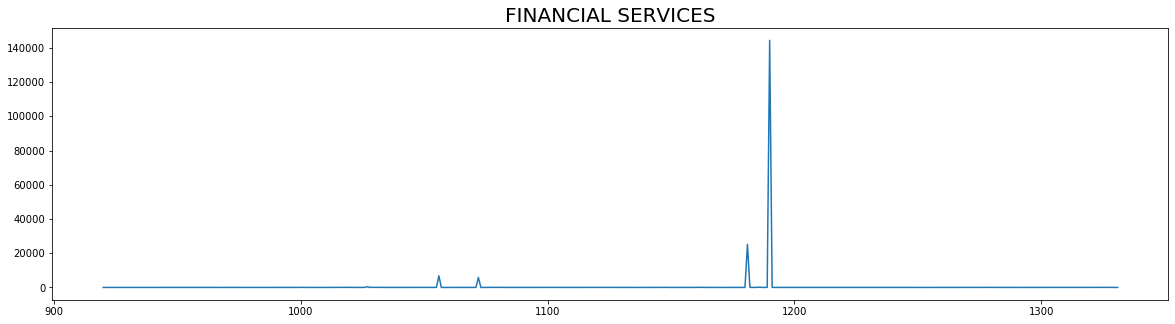

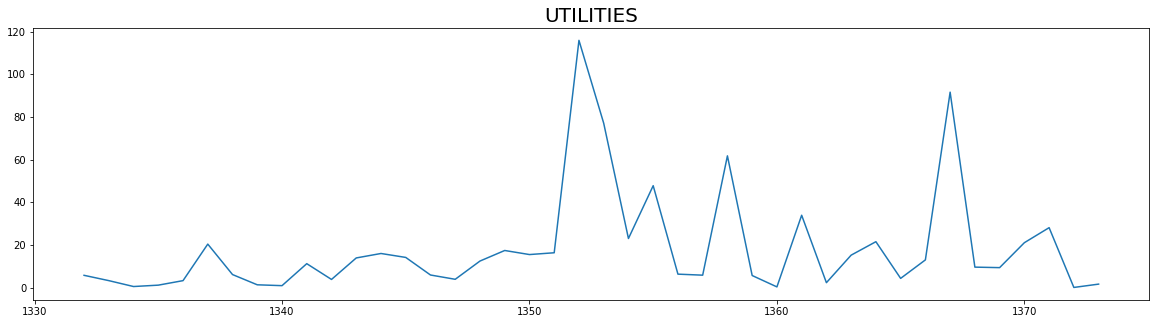

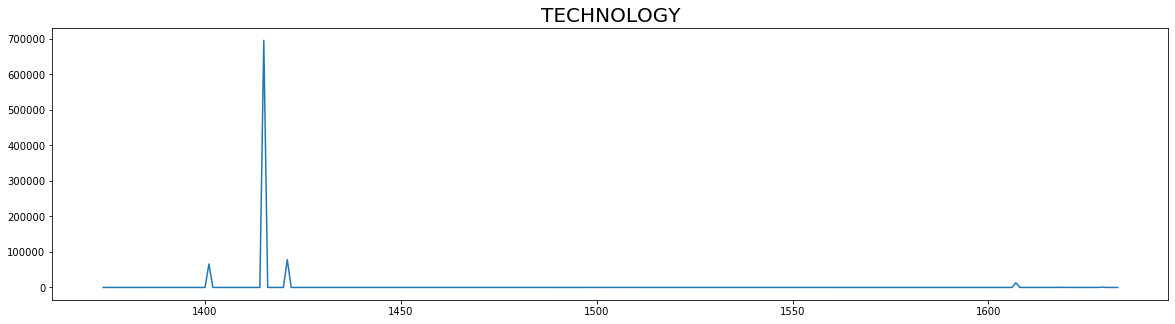

In [26]:
# looking at the trading history of each sector

df_ = df_2014.loc[:, ['Sector', '2015 PRICE VAR [%]']]

sector_list = df_['Sector'].unique()

for sector in sector_list:
    temp = df_[df_['Sector'] == sector]
    
    plt.figure(figsize = (20, 5))
    plt.plot(temp['2015 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize = 20)
    plt.show()

In [27]:
df_2018.head()

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  \
Unnamed: 0.1                                                              
CMCSA                  0  9.450700e+10          0.1115     0.000000e+00   
KMI                    1  1.414400e+10          0.0320     7.288000e+09   
INTC                   2  7.084800e+10          0.1289     2.711100e+10   
MU                     3  3.039100e+10          0.4955     1.250000e+10   
GE                     4  1.216150e+11          0.0285     9.546100e+10   

              Gross Profit  R&D Expenses  SG&A Expense  Operating Expenses  \
Unnamed: 0.1                                                                 
CMCSA         9.450700e+10  0.000000e+00  6.482200e+10        7.549800e+10   
KMI           6.856000e+09  0.000000e+00  6.010000e+08        3.062000e+09   
INTC          4.373700e+10  1.354300e+10  6.750000e+09        2.042100e+10   
MU            1.789100e+10  2.141000e+09  8.130000e+08        2.897000e+09   
GE            2.615400e+10  0.000000e+00  1.811100e+10        4.071100e+10   

              Operating Income  Interest Expense  ...  Receivables growth  \
Unnamed: 0.1                                      ...                       
CMCSA             1.900900e+10      3.542000e+09  ...              0.2570   
KMI               3.794000e+09      1.917000e+09  ...              0.0345   
INTC              2.331600e+10     -1.260000e+08  ...              0.1989   
MU                1.499400e+10      3.420000e+08  ...              0.4573   
GE               -1.455700e+10      5.059000e+09  ...             -0.2781   

              Inventory Growth  Asset Growth  Book Value per Share Growth  \
Unnamed: 0.1                                                                
CMCSA                   0.0000        0.3426                       0.0722   
KMI                    -0.0920       -0.0024                       0.0076   
INTC                    0.0387        0.0382                       0.1014   
MU                      0.1511        0.2275                       0.6395   
GE                     -0.2892       -0.1575                      -0.4487   

              Debt Growth  R&D Expense Growth  SG&A Expenses Growth  \
Unnamed: 0.1                                                          
CMCSA              0.7309              0.0000                0.1308   
KMI               -0.0137              0.0000               -0.1265   
INTC              -0.0169              0.0390               -0.0942   
MU                -0.5841              0.1738                0.0942   
GE                -0.2297              0.0000                0.0308   

                         Sector  2019 PRICE VAR [%]  Class  
Unnamed: 0.1                                                
CMCSA         Consumer Cyclical           32.794573      1  
KMI                      Energy           40.588068      1  
INTC                 Technology           30.295514      1  
MU                   Technology           64.213737      1  
GE                  Industrials           44.757840      1  

[5 rows x 225 columns]

In [28]:
list(df_2018)

['Unnamed: 0',
 'Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt'

In [29]:
# looking at which sector has the most stocks

1    3046
Name: Class, dtype: int64


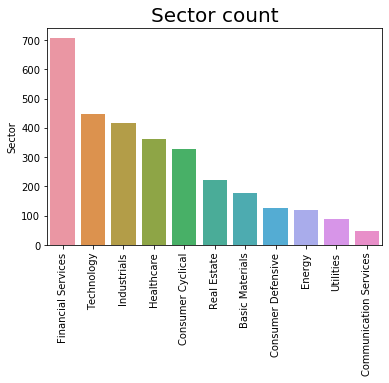

In [33]:
print(df_2018['Class'].value_counts())

df_sector = df_2018['Sector'].value_counts()
sns.barplot(np.arange(len(df_sector)), df_sector)
plt.title('Sector count', fontsize = 20)
plt.xticks(np.arange(len(df_sector)), df_sector.index.values.tolist(), rotation = 90)
plt.show();

#plt.savefig('sector_count.png')

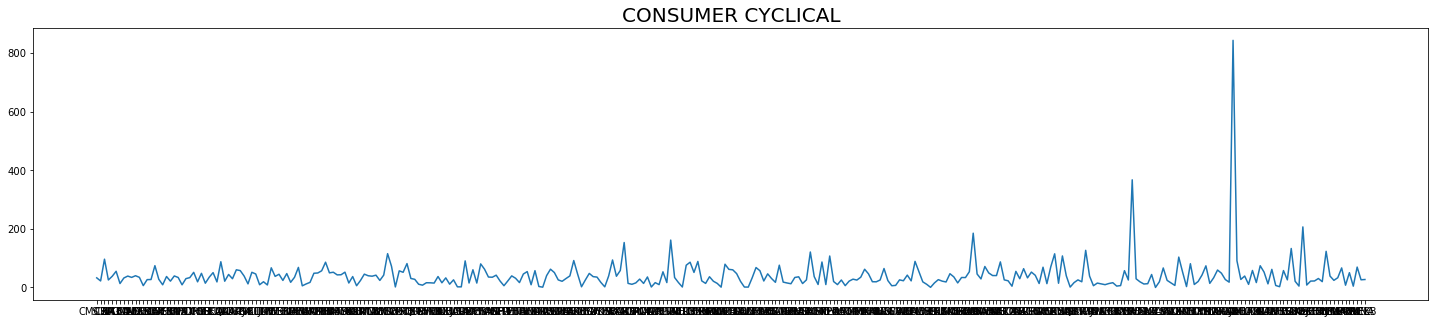

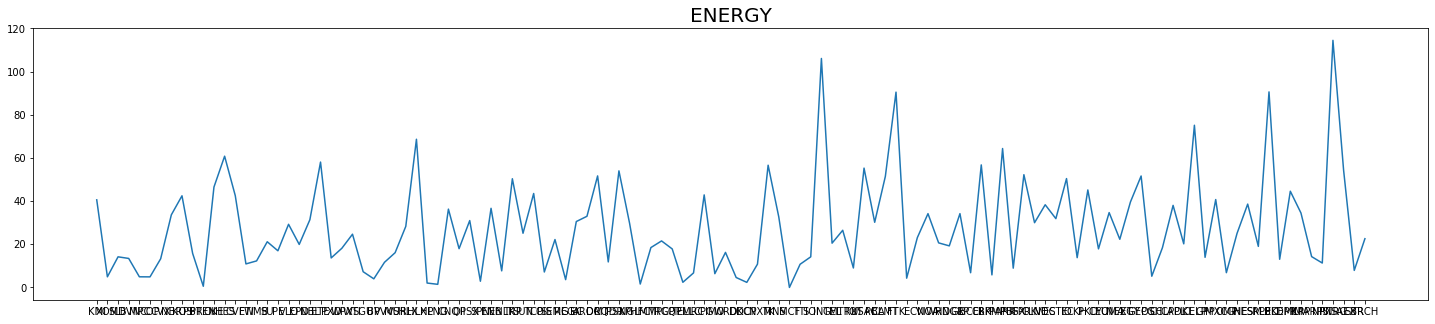

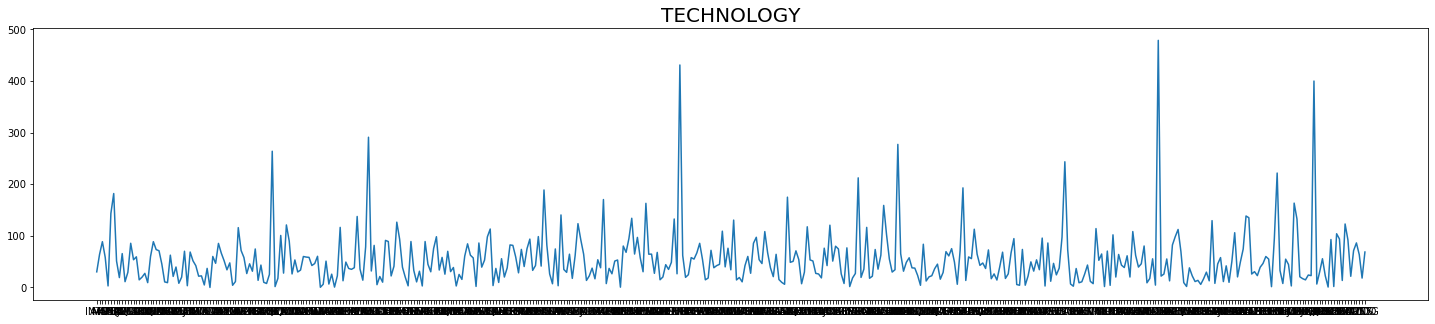

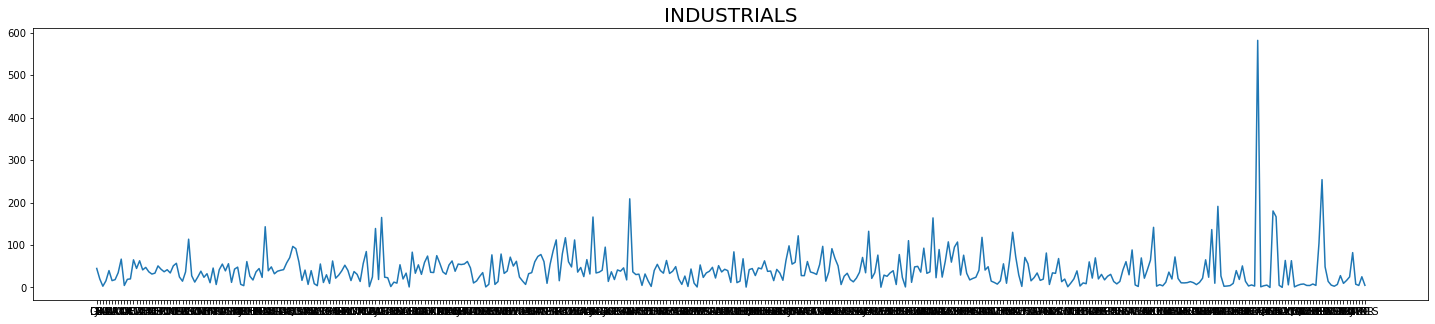

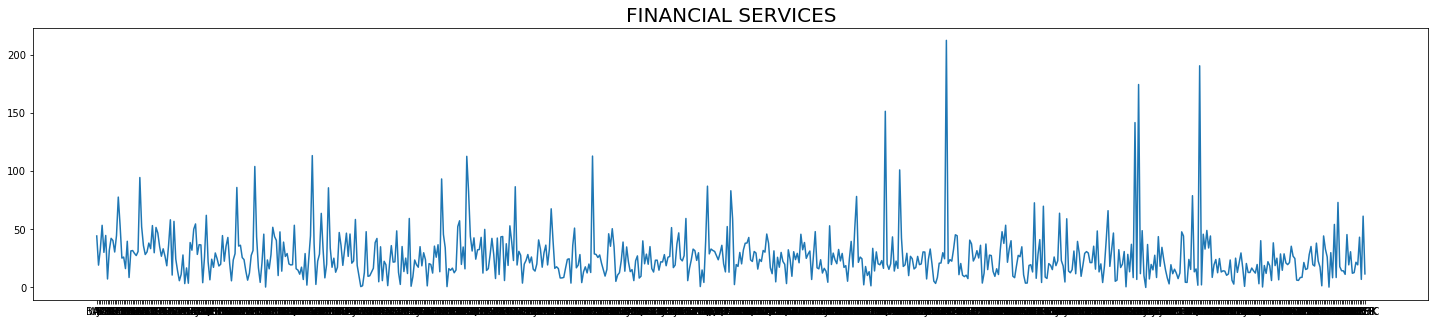

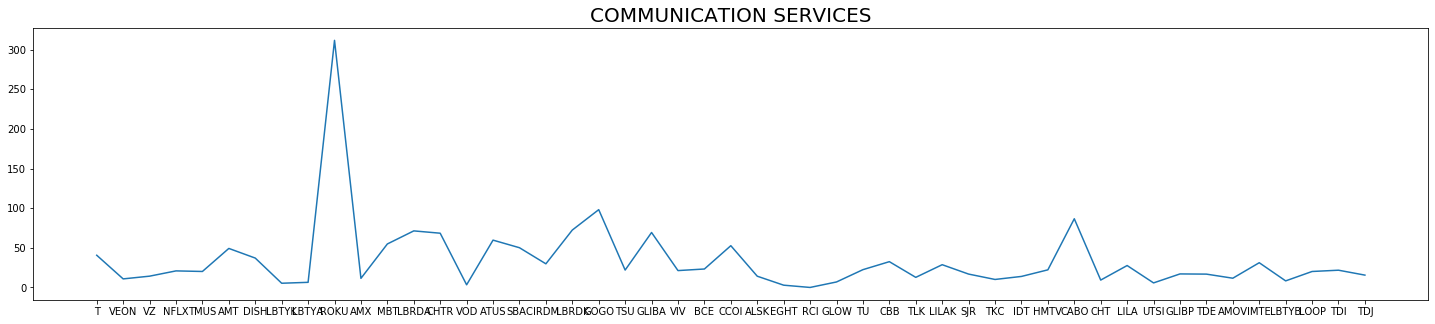

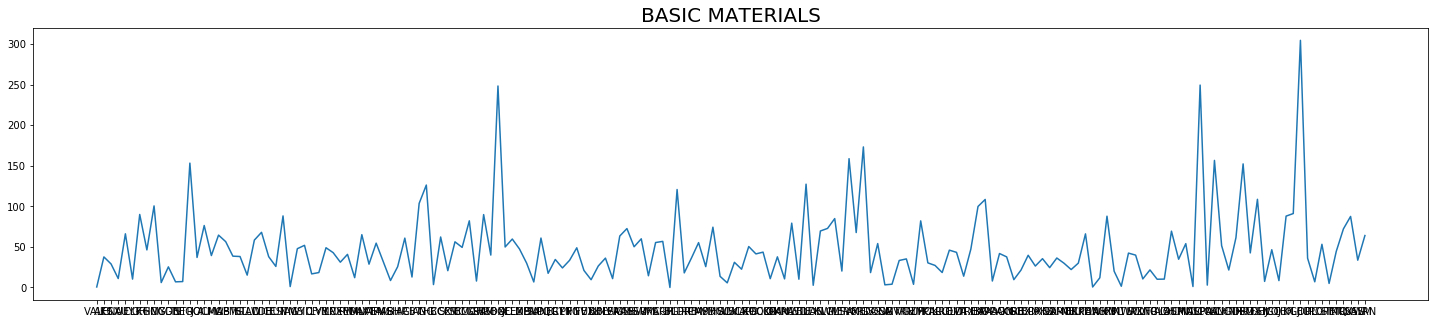

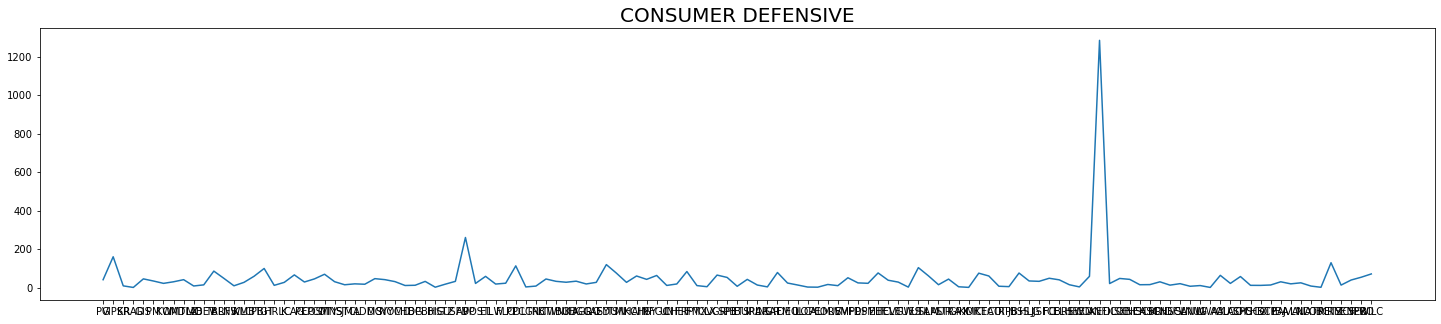

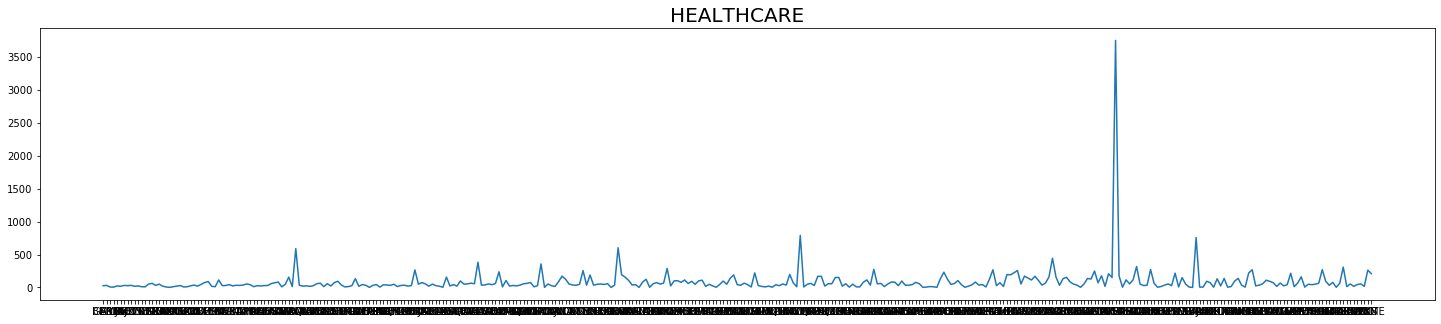

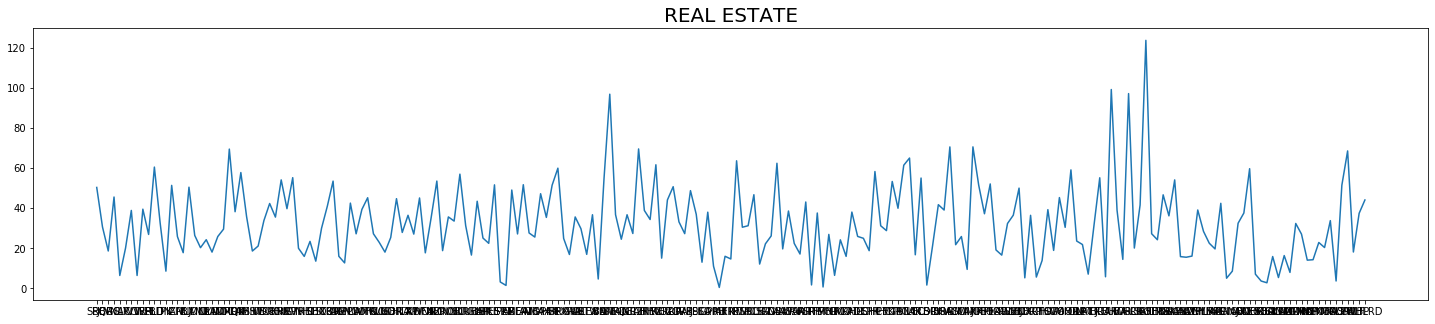

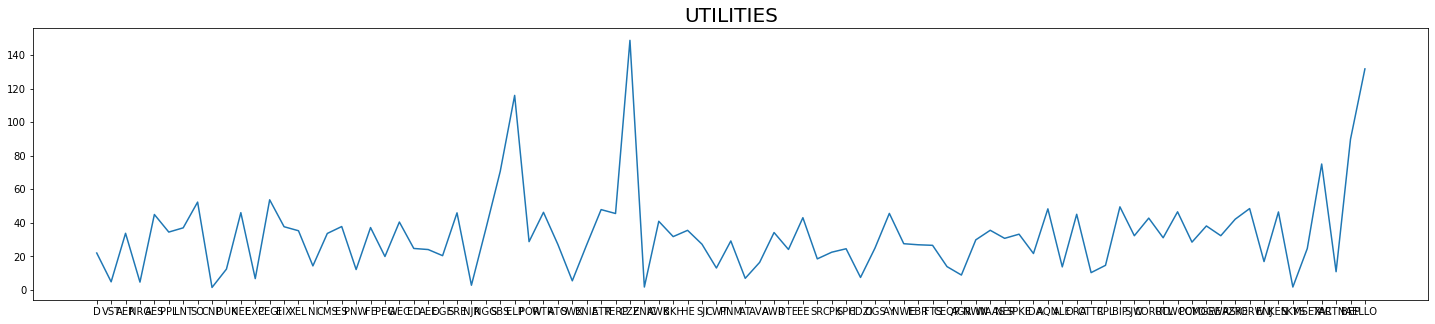

In [31]:
df_18 = df_2018.loc[:, ['Sector', '2019 PRICE VAR [%]']]

sector_list_18 = df_18['Sector'].unique()

for sector in sector_list_18:
    
    temp_18 = df_18[df_18['Sector'] == sector]
    
    plt.figure(figsize = (25, 5))
    plt.plot(temp_18['2019 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize = 20)
    plt.show();
    
    

In [34]:
# sectors with major peaks are
# Consumer Cyclical
# Technology
# Industrials
# Financial Services
# Communication Services
# Consumer Defensive
# Healthcare

# with these gains we want to make sure that they were real gains

In [35]:
df_2018.head()

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  \
Unnamed: 0.1                                                              
CMCSA                  0  9.450700e+10          0.1115     0.000000e+00   
KMI                    1  1.414400e+10          0.0320     7.288000e+09   
INTC                   2  7.084800e+10          0.1289     2.711100e+10   
MU                     3  3.039100e+10          0.4955     1.250000e+10   
GE                     4  1.216150e+11          0.0285     9.546100e+10   

              Gross Profit  R&D Expenses  SG&A Expense  Operating Expenses  \
Unnamed: 0.1                                                                 
CMCSA         9.450700e+10  0.000000e+00  6.482200e+10        7.549800e+10   
KMI           6.856000e+09  0.000000e+00  6.010000e+08        3.062000e+09   
INTC          4.373700e+10  1.354300e+10  6.750000e+09        2.042100e+10   
MU            1.789100e+10  2.141000e+09  8.130000e+08        2.897000e+09   
GE            2.615400e+10  0.000000e+00  1.811100e+10        4.071100e+10   

              Operating Income  Interest Expense  ...  Receivables growth  \
Unnamed: 0.1                                      ...                       
CMCSA             1.900900e+10      3.542000e+09  ...              0.2570   
KMI               3.794000e+09      1.917000e+09  ...              0.0345   
INTC              2.331600e+10     -1.260000e+08  ...              0.1989   
MU                1.499400e+10      3.420000e+08  ...              0.4573   
GE               -1.455700e+10      5.059000e+09  ...             -0.2781   

              Inventory Growth  Asset Growth  Book Value per Share Growth  \
Unnamed: 0.1                                                                
CMCSA                   0.0000        0.3426                       0.0722   
KMI                    -0.0920       -0.0024                       0.0076   
INTC                    0.0387        0.0382                       0.1014   
MU                      0.1511        0.2275                       0.6395   
GE                     -0.2892       -0.1575                      -0.4487   

              Debt Growth  R&D Expense Growth  SG&A Expenses Growth  \
Unnamed: 0.1                                                          
CMCSA              0.7309              0.0000                0.1308   
KMI               -0.0137              0.0000               -0.1265   
INTC              -0.0169              0.0390               -0.0942   
MU                -0.5841              0.1738                0.0942   
GE                -0.2297              0.0000                0.0308   

                         Sector  2019 PRICE VAR [%]  Class  
Unnamed: 0.1                                                
CMCSA         Consumer Cyclical           32.794573      1  
KMI                      Energy           40.588068      1  
INTC                 Technology           30.295514      1  
MU                   Technology           64.213737      1  
GE                  Industrials           44.757840      1  

[5 rows x 225 columns]

In [37]:
# there was originally 34 stocks that were top gainers but some of them are not
# active stocks today so i droped them from the dataset

df_2018 = df_2018.drop(index = ['ANFI', 'SSI' ,'ALIM', 'ARQL', 'HEBT',
                                       'MDCO', 'AVP', 'ACHN', 'BASI'])

25 Stocks with more than 250% gain



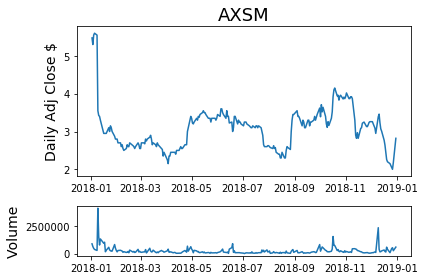

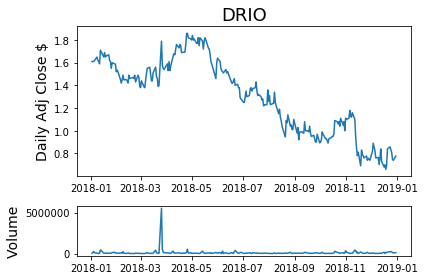

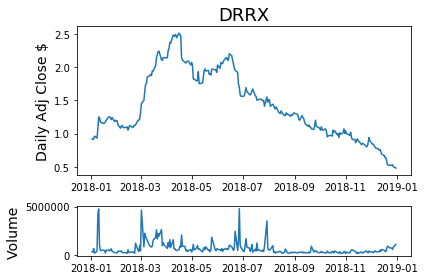

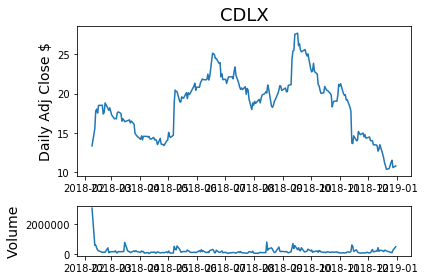

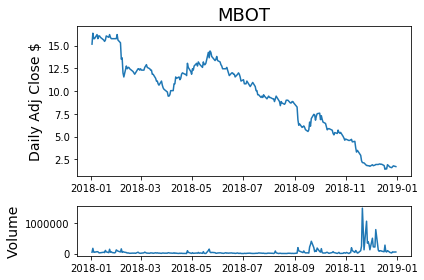

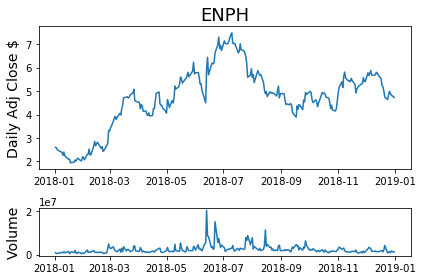

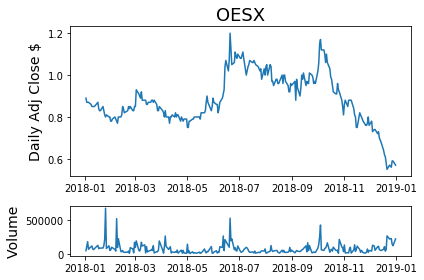

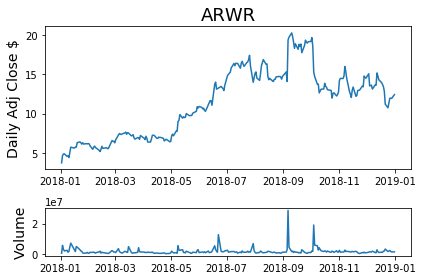

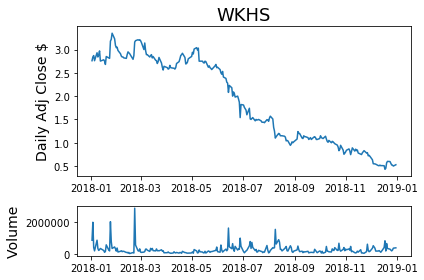

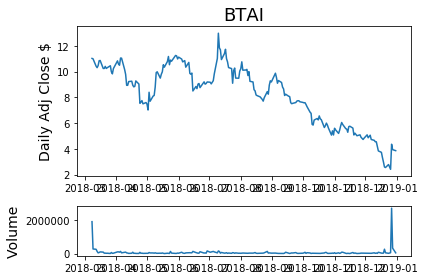

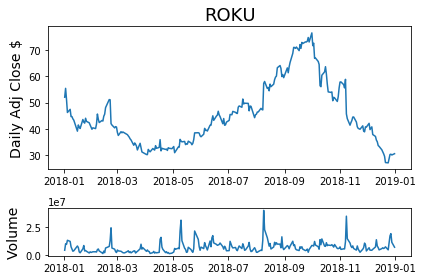

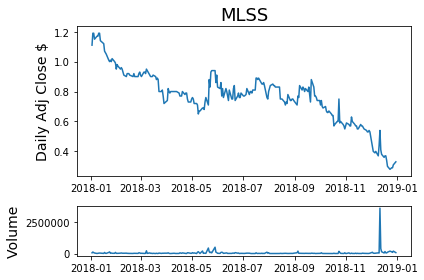

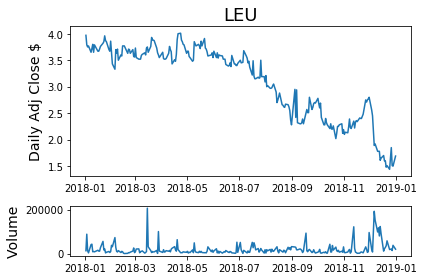

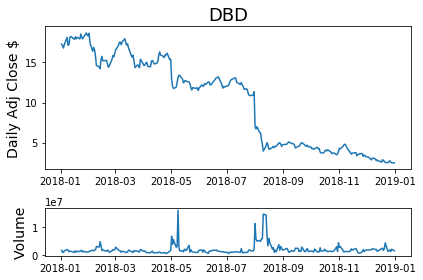

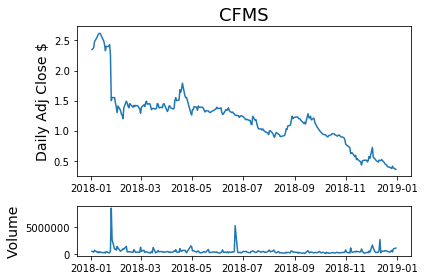

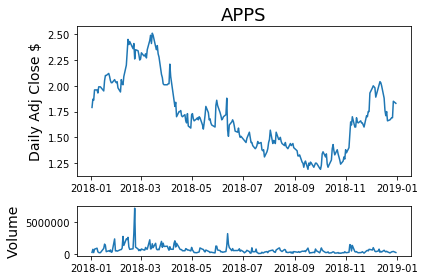

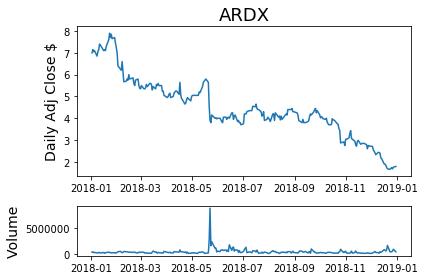

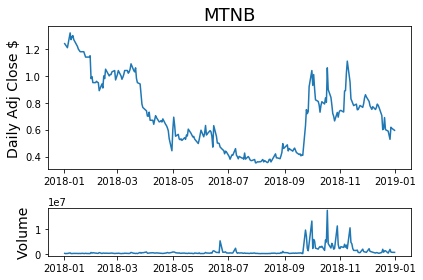

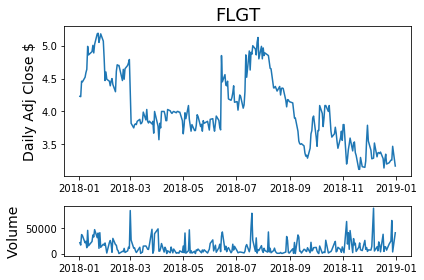

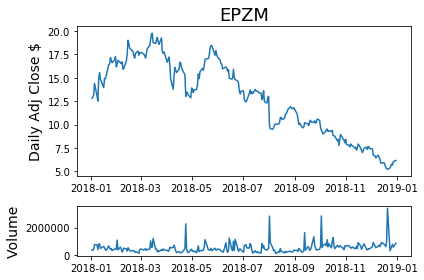

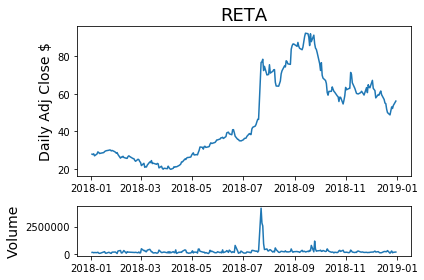

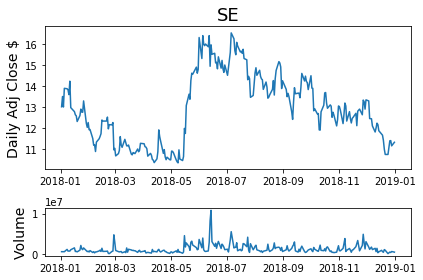

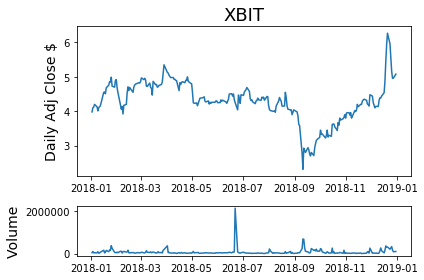

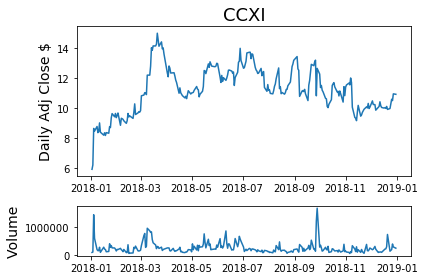

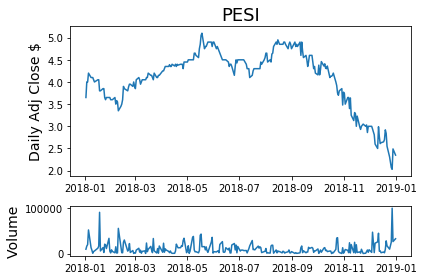

In [38]:
# looking at stocks with 250% gains

gain = 250


top_gainers = df_2018[df_2018['2019 PRICE VAR [%]'] >= gain]
top_gainers = top_gainers['2019 PRICE VAR [%]'].sort_values(ascending = False)

# there was originally 34 stocks that were top gainers but some of them are not
# active stocks today so i droped them from the dataset

print(f'{len(top_gainers)} Stocks with more than {gain}% gain')
print()

date_start = '01-01-2018'
date_end = '12-31-2018'
tickers = top_gainers.index.values.tolist()

for ticker in tickers:
    
    daily_price = DataReader(ticker, 'yahoo', date_start, date_end)
    
    fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw = {'height_ratios': [3, 1]})
    
    ax0.plot(daily_price['Adj Close'])
    ax0.set_title(ticker, fontsize = 18)
    ax0.set_ylabel('Daily Adj Close $', fontsize = 14)
    ax1.plot(daily_price['Volume'])
    ax1.set_ylabel('Volume', fontsize = 14)
  

    fig.align_ylabels(ax1)
    fig.tight_layout()
    plt.show()

In [39]:
# looking at the trade history to see how active the stock is 

# if there was a straight line in the history then that means that there was no 
# trading of the stock

# which all of them look pretty active

In [40]:
# i kept getting errors that some stocks couldn't be found so down below i am 
# checking which stock are still active that i can use
# using yfinance which pulls the stock info from yahoo



[*********************100%***********************]  1 of 1 completed


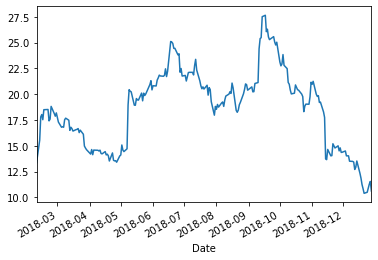

In [41]:
# inputing each name from the list to see if it is still active so i can use it 
# in the dataset


test = yf.download('CDLX', '2018-01-01', '2018-12-31')
test['Adj Close'].plot()
plt.show()

# DROP = ANFI, SSI, ALIM, ARQL, HEBT, MDCO, AVP, ACHN, 
#
# KEEP = AXSM, DRIO, DRRX, CDLX, MBOT, ENPH, OESX, ARWR, WKHS, BTAI, ROKU, MLSS
#        LEU, DBD, CFMS, APPS, ARDX, MTNB, FLGT, BASI, EPZM, RETA, SE, XBIT, CCXI
#.       PESI

In [42]:
len(top_gainers)
# i dropped 9 stocks that couldn't be found

25

In [44]:
tickers

['AXSM',
 'DRIO',
 'DRRX',
 'CDLX',
 'MBOT',
 'ENPH',
 'OESX',
 'ARWR',
 'WKHS',
 'BTAI',
 'ROKU',
 'MLSS',
 'LEU',
 'DBD',
 'CFMS',
 'APPS',
 'ARDX',
 'MTNB',
 'FLGT',
 'EPZM',
 'RETA',
 'SE',
 'XBIT',
 'CCXI',
 'PESI']

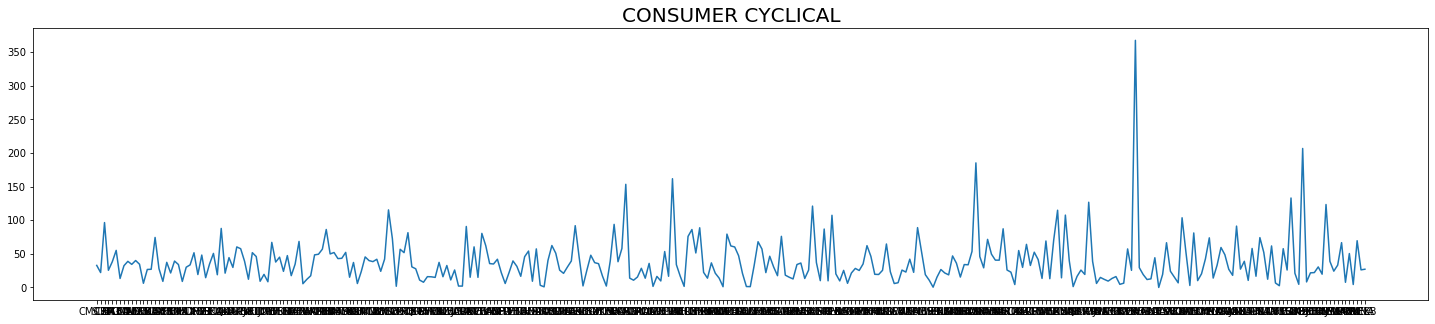

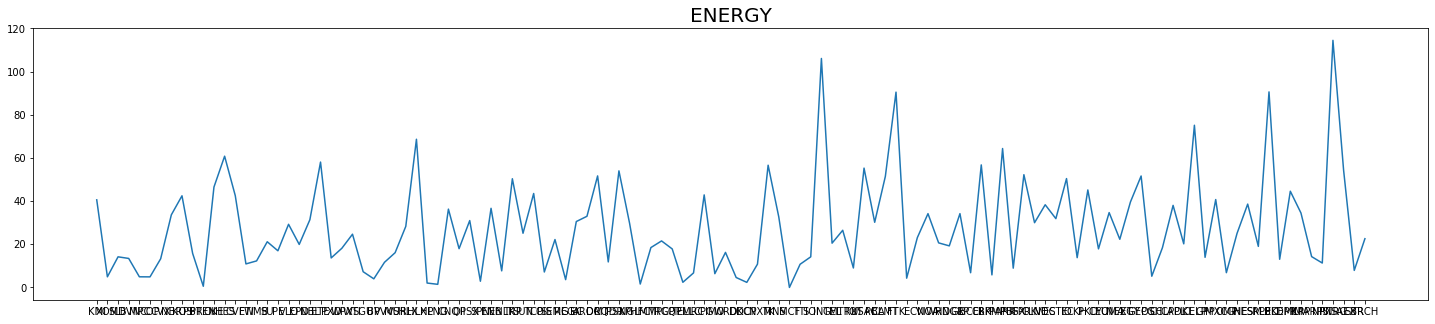

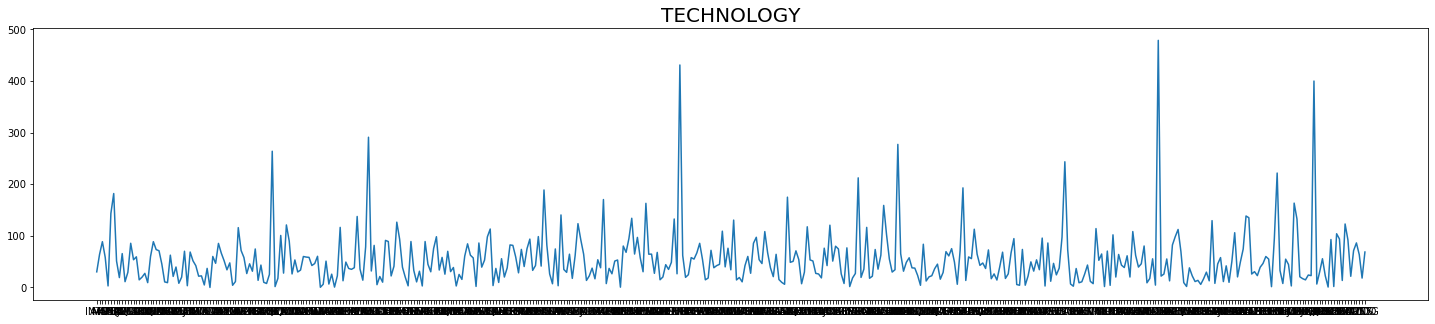

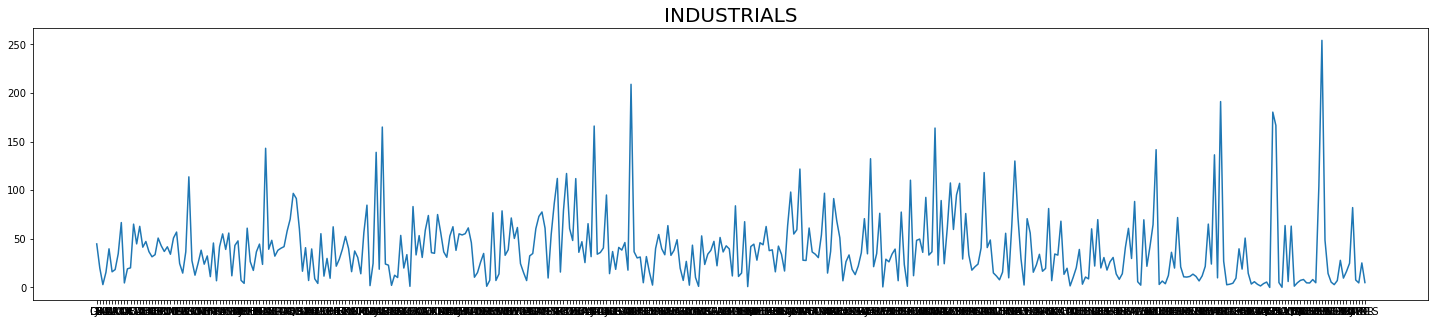

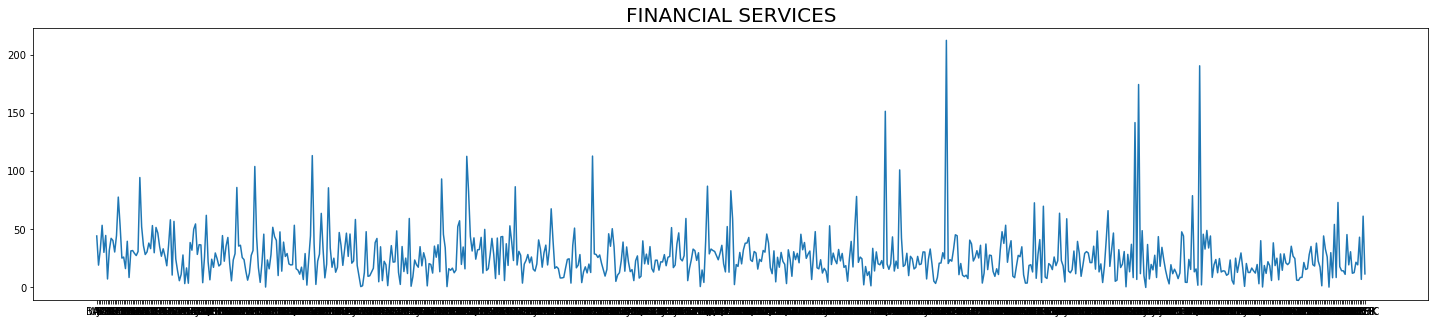

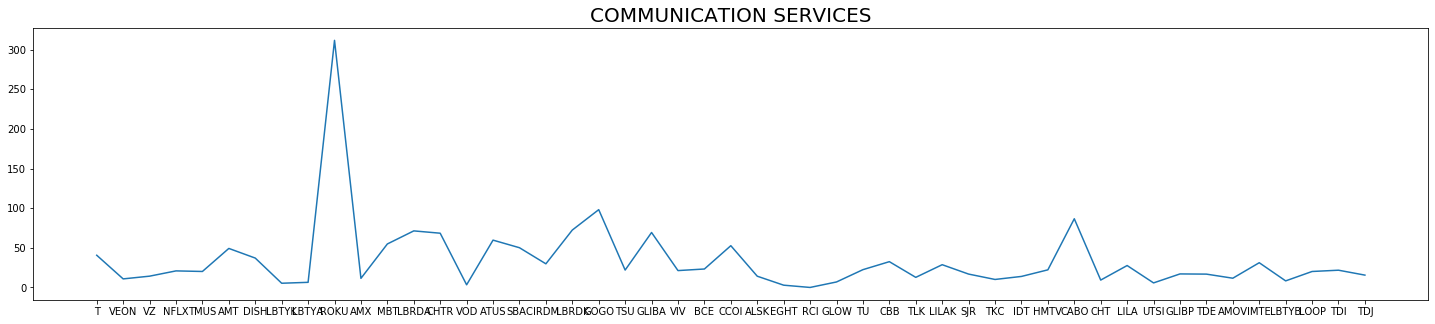

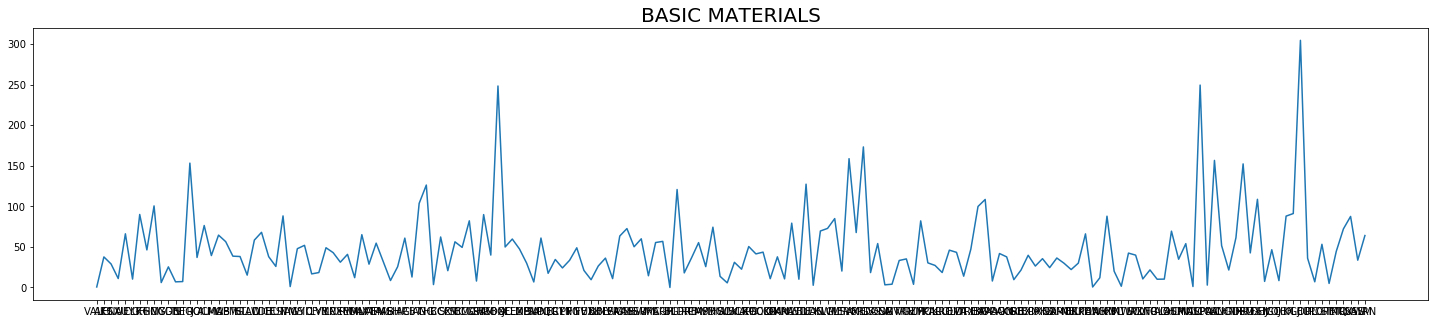

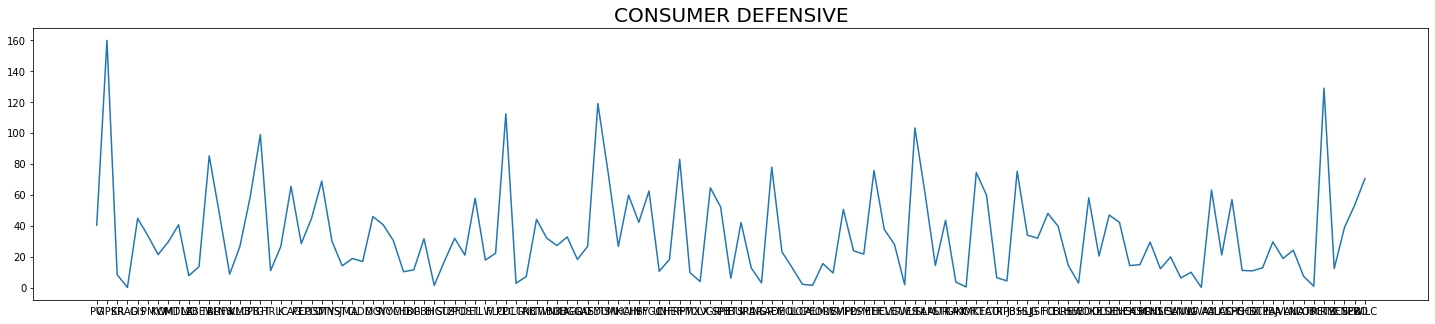

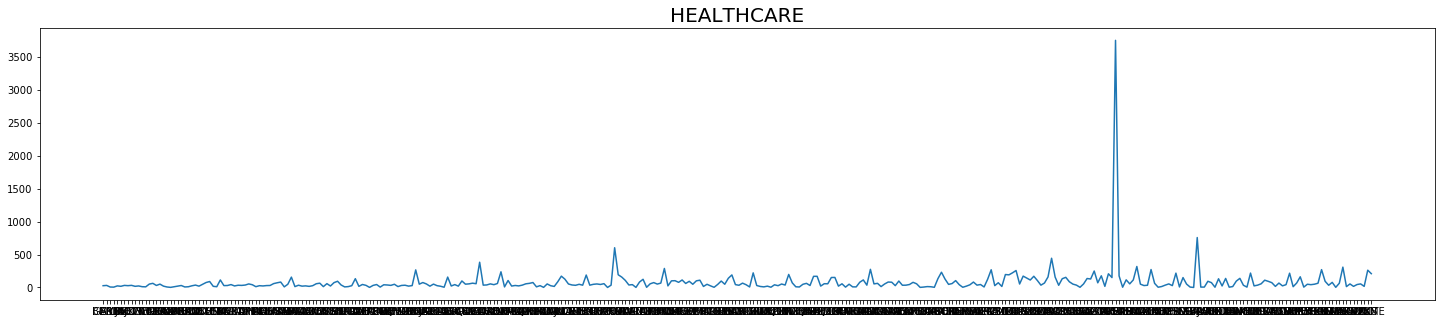

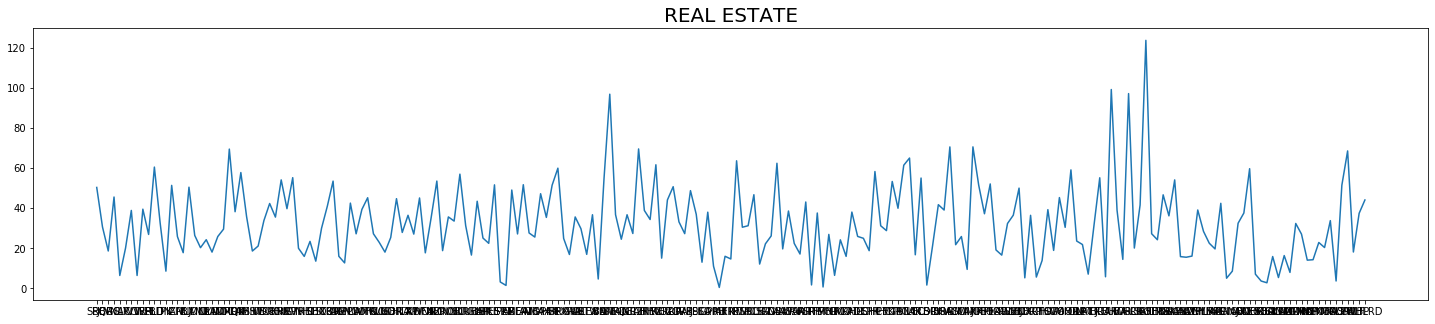

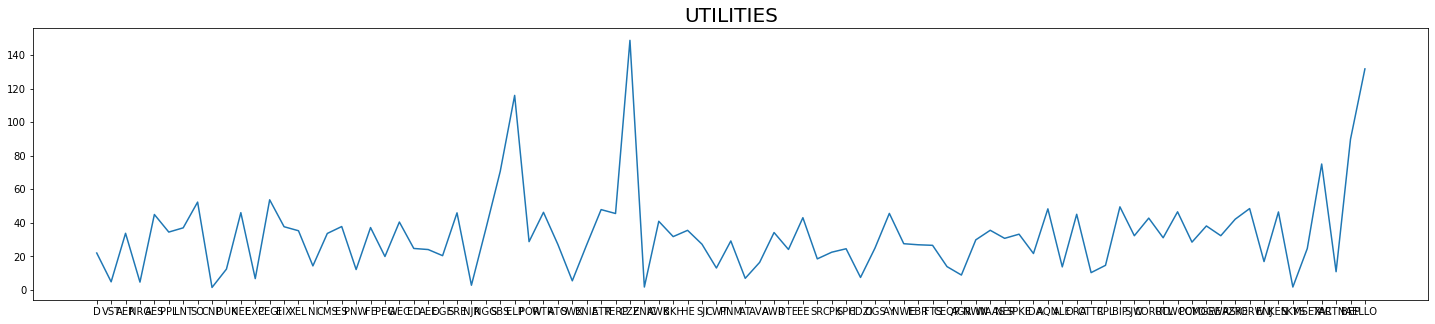

In [45]:
# looking at the sectors again with the dropped stocks that couldn't be found

df_ = df_2018.loc[:, ['Sector', '2019 PRICE VAR [%]']]
sector_list = df_['Sector'].unique()

for sector in sector_list:
    
    temp = df_[df_['Sector'] == sector]
    
    plt.figure(figsize = (25, 5))
    plt.plot(temp['2019 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize = 20)
    plt.show()

In [46]:
# checking missing values



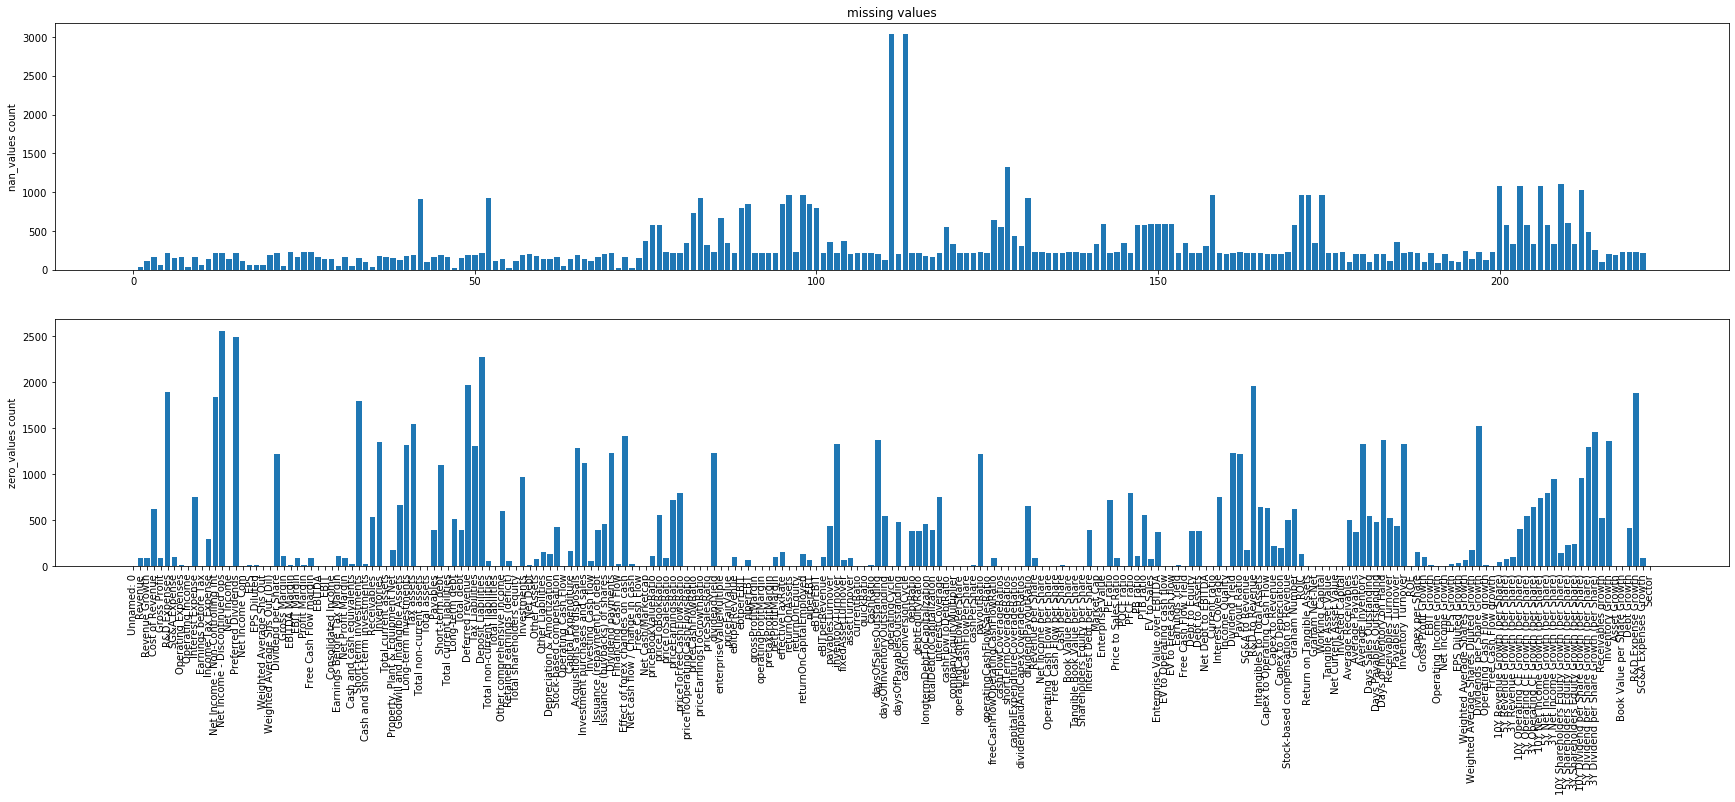

In [47]:
class_data = df_2018.loc[:, ['Class', '2019 PRICE VAR [%]']]
df_2018.drop(['Class', '2019 PRICE VAR [%]'], inplace = True, axis = 1)

nan_values = df_2018.isna().sum()
zero_values = df_2018.isin([0]).sum()
ind = np.arange(df_2018.shape[1])

plt.figure(figsize = (30, 10))

plt.subplot(2, 1, 1)
plt.title('missing values')
plt.bar(ind, nan_values.values.tolist())
plt.ylabel('nan_values count')

plt.subplot(2, 1, 2)
plt.bar(ind, zero_values.values.tolist())
plt.ylabel('zero_values count')
plt.xticks(ind, nan_values.index.values, rotation = 90)

plt.show()

In [48]:
# plot correlation matrix heatmap

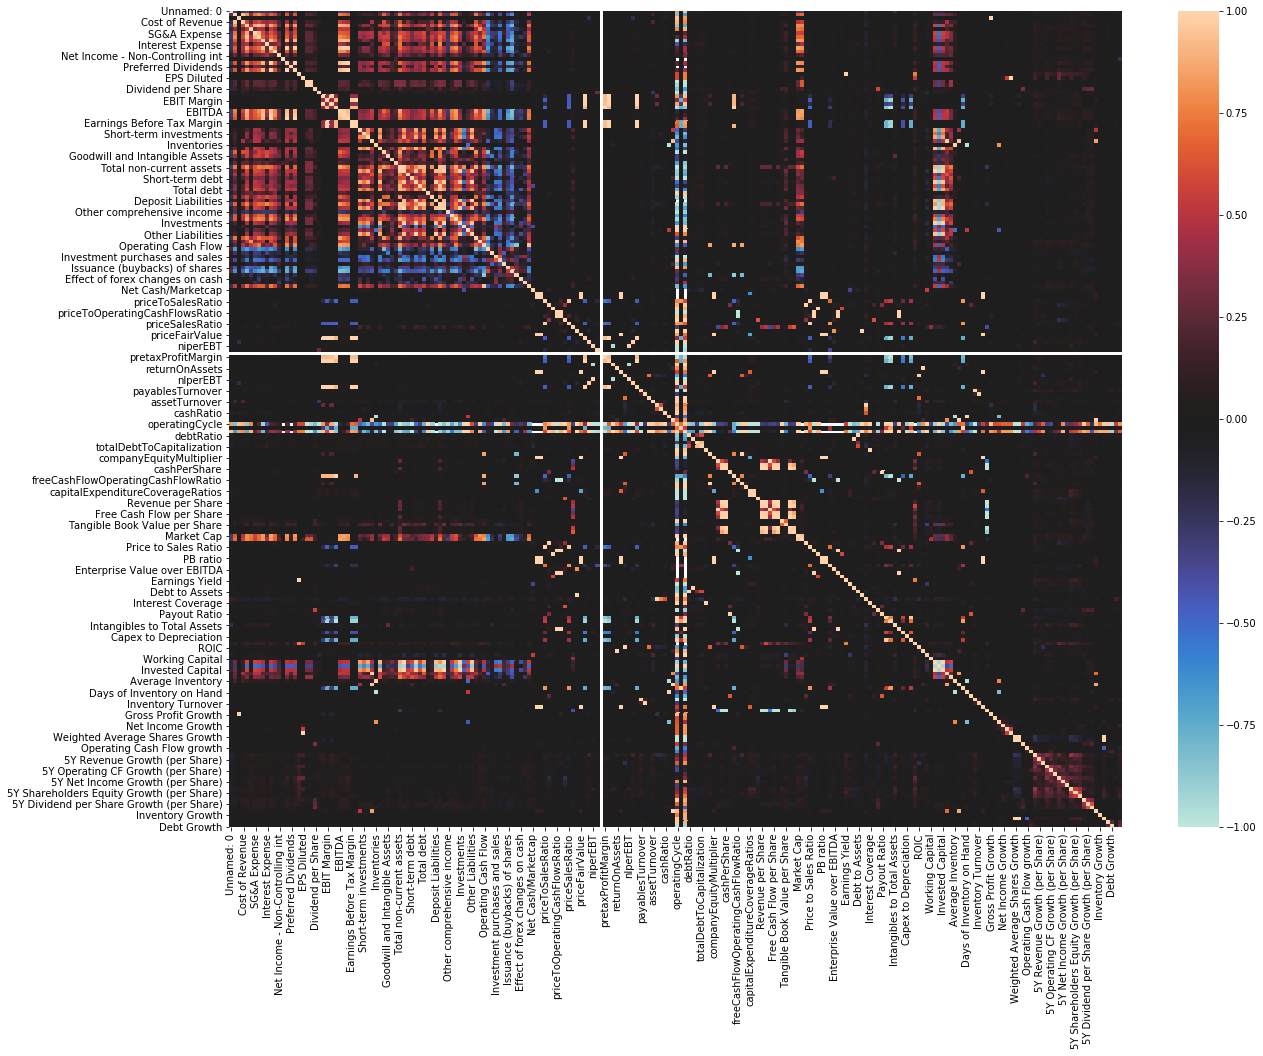

In [62]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(df_2018.corr(), annot = False, vmin = -1, vmax = 1, center = 0, ax = ax)
plt.show()

In [50]:
data = yf.download(tickers, '2018-01-01', '2018-12-31')

data

[*********************100%***********************]  25 of 25 completed


Adj Close                                                 \
                APPS  ARDX   ARWR   AXSM  BTAI   CCXI   CDLX   CFMS   
Date                                                                  
2018-01-02      1.79  7.00   3.72  5.475   NaN   5.90    NaN  2.350   
2018-01-03      1.87  7.15   4.64  5.300   NaN   6.19    NaN  2.360   
2018-01-04      1.86  7.05   4.85  5.550   NaN   8.63    NaN  2.380   
2018-01-05      1.96  7.10   4.87  5.600   NaN   8.45    NaN  2.480   
2018-01-08      1.96  6.85   4.55  5.550   NaN   8.76    NaN  2.550   
...              ...   ...    ...    ...   ...    ...    ...    ...   
2018-12-21      1.66  1.68  11.21  2.200  2.55   9.90  10.40  0.402   
2018-12-24      1.67  1.66  10.74  2.150  2.78   9.96  10.50  0.390   
2018-12-26      1.69  1.74  11.96  2.050  2.41  10.58  11.29  0.372   
2018-12-27      1.69  1.68  11.97  2.000  4.36  10.49  11.55  0.410   
2018-12-28      1.85  1.76  11.94  2.180  3.94  10.94  10.62  0.380   

                              ...  Volume                                   \
                  DBD   DRIO  ...    MBOT    MLSS     MTNB    OESX    PESI   
Date                          ...                                            
2018-01-02  17.279999  1.610  ...   44313   54700   145800   46800    9600   
2018-01-03  17.081381  1.610  ...  171293  121800    53900  114300   16500   
2018-01-04  16.783447  1.610  ...   49220   72700   102300  182000   19800   
2018-01-05  17.230345  1.620  ...   44720   41500    96000   68300   52300   
2018-01-08  18.124138  1.650  ...   62167    5600   343400  107500   13100   
...               ...    ...  ...     ...     ...      ...     ...     ...   
2018-12-21   2.520000  0.840  ...   96600  106400  1220500  268900   17000   
2018-12-24   2.530000  0.858  ...   37900  193500   260200  221500    9700   
2018-12-26   2.750000  0.808  ...   21900  137500  1784600  228400   25400   
2018-12-27   2.600000  0.748  ...   56400   93800   685700  143600  100600   
2018-12-28   2.500000  0.739  ...   49800  192800   584200  121400   26500   

                                                        
              RETA      ROKU       SE     WKHS    XBIT  
Date                                                    
2018-01-02  173500   4226700   685700   858300   45000  
2018-01-03  182200   9911800   681200  1975500  100800  
2018-01-04  141800   9392600   703700   407700   39900  
2018-01-05  164700  13007900   682500   195800   41800  
2018-01-08  153500  12031400  1245900   860400   35900  
...            ...       ...      ...      ...     ...  
2018-12-21  341700   7210300  1035900   343300  313400  
2018-12-24  104800   4558500   211800   303300  210100  
2018-12-26  304900  16972200   591600   193800  331700  
2018-12-27  142000  18877200   487900   249400  177000  
2018-12-28  183800  11221700   727400   365600   90000  

[250 rows x 150 columns]

In [51]:
data_adj_close = data['Adj Close']

In [52]:
data_adj_close

APPS  ARDX   ARWR   AXSM  BTAI   CCXI   CDLX   CFMS        DBD  \
Date                                                                         
2018-01-02  1.79  7.00   3.72  5.475   NaN   5.90    NaN  2.350  17.279999   
2018-01-03  1.87  7.15   4.64  5.300   NaN   6.19    NaN  2.360  17.081381   
2018-01-04  1.86  7.05   4.85  5.550   NaN   8.63    NaN  2.380  16.783447   
2018-01-05  1.96  7.10   4.87  5.600   NaN   8.45    NaN  2.480  17.230345   
2018-01-08  1.96  6.85   4.55  5.550   NaN   8.76    NaN  2.550  18.124138   
...          ...   ...    ...    ...   ...    ...    ...    ...        ...   
2018-12-21  1.66  1.68  11.21  2.200  2.55   9.90  10.40  0.402   2.520000   
2018-12-24  1.67  1.66  10.74  2.150  2.78   9.96  10.50  0.390   2.530000   
2018-12-26  1.69  1.74  11.96  2.050  2.41  10.58  11.29  0.372   2.750000   
2018-12-27  1.69  1.68  11.97  2.000  4.36  10.49  11.55  0.410   2.600000   
2018-12-28  1.85  1.76  11.94  2.180  3.94  10.94  10.62  0.380   2.500000   

             DRIO  ...       MBOT  MLSS   MTNB  OESX  PESI       RETA  \
Date               ...                                                  
2018-01-02  1.610  ...  15.150000  1.11  1.240  0.89  3.65  27.969999   
2018-01-03  1.610  ...  16.350000  1.19  1.230  0.87  4.00  27.780001   
2018-01-04  1.610  ...  15.750000  1.19  1.220  0.87  4.00  28.160000   
2018-01-05  1.620  ...  15.750000  1.15  1.210  0.87  4.20  27.080000   
2018-01-08  1.650  ...  16.200001  1.17  1.320  0.86  4.10  28.090000   
...           ...  ...        ...   ...    ...   ...   ...        ...   
2018-12-21  0.840  ...   1.930000  0.30  0.600  0.55  2.55  50.009998   
2018-12-24  0.858  ...   1.660000  0.28  0.589  0.57  2.31  48.759998   
2018-12-26  0.808  ...   1.600000  0.29  0.528  0.56  2.07  53.000000   
2018-12-27  0.748  ...   1.700000  0.29  0.618  0.59  2.03  52.169998   
2018-12-28  0.739  ...   1.800000  0.31  0.610  0.59  2.49  53.779999   

                 ROKU     SE   WKHS  XBIT  
Date                                       
2018-01-02  52.070000  13.01  2.760  3.98  
2018-01-03  55.439999  13.50  2.840  4.10  
2018-01-04  51.240002  13.00  2.870  4.12  
2018-01-05  46.279999  13.89  2.760  4.20  
2018-01-08  47.470001  13.87  2.930  4.13  
...               ...    ...    ...   ...  
2018-12-21  27.280001  10.74  0.600  6.27  
2018-12-24  27.170000  10.74  0.597  5.96  
2018-12-26  30.350000  11.39  0.522  5.16  
2018-12-27  30.459999  11.40  0.520  4.96  
2018-12-28  30.160000  11.15  0.500  4.96  

[250 rows x 25 columns]

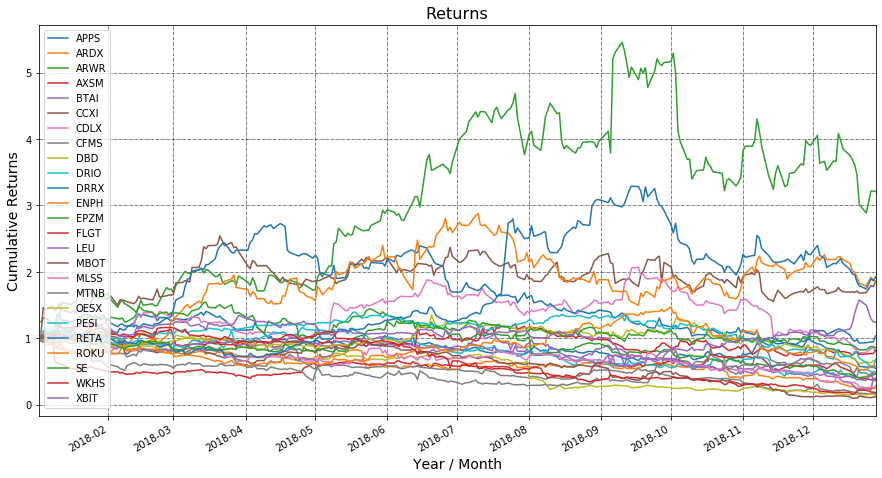

In [53]:
((data_adj_close.pct_change() + 1).cumprod()).plot(figsize = (15,8))



plt.title('Returns', fontsize = 16)
plt.ylabel('Cumulative Returns', fontsize = 14)
plt.xlabel('Year / Month', fontsize = 14)
plt.legend()
plt.grid(which = 'major', color = 'k', linestyle = '-.', linewidth = .5)
plt.show()

In [54]:
data.head()

Adj Close                                                      \
                APPS  ARDX  ARWR   AXSM BTAI  CCXI CDLX  CFMS        DBD   
Date                                                                       
2018-01-02      1.79  7.00  3.72  5.475  NaN  5.90  NaN  2.35  17.279999   
2018-01-03      1.87  7.15  4.64  5.300  NaN  6.19  NaN  2.36  17.081381   
2018-01-04      1.86  7.05  4.85  5.550  NaN  8.63  NaN  2.38  16.783447   
2018-01-05      1.96  7.10  4.87  5.600  NaN  8.45  NaN  2.48  17.230345   
2018-01-08      1.96  6.85  4.55  5.550  NaN  8.76  NaN  2.55  18.124138   

                  ...  Volume                                         \
            DRIO  ...    MBOT    MLSS    MTNB    OESX   PESI    RETA   
Date              ...                                                  
2018-01-02  1.61  ...   44313   54700  145800   46800   9600  173500   
2018-01-03  1.61  ...  171293  121800   53900  114300  16500  182200   
2018-01-04  1.61  ...   49220   72700  102300  182000  19800  141800   
2018-01-05  1.62  ...   44720   41500   96000   68300  52300  164700   
2018-01-08  1.65  ...   62167    5600  343400  107500  13100  153500   

                                                
                ROKU       SE     WKHS    XBIT  
Date                                            
2018-01-02   4226700   685700   858300   45000  
2018-01-03   9911800   681200  1975500  100800  
2018-01-04   9392600   703700   407700   39900  
2018-01-05  13007900   682500   195800   41800  
2018-01-08  12031400  1245900   860400   35900  

[5 rows x 150 columns]

In [55]:
df = yf.download('APPS', '2018-01-01', '2018-12-31')
df.head()

[*********************100%***********************]  1 of 1 completed


Open  High   Low  Close  Adj Close  Volume
Date                                                  
2018-01-02  1.80  1.84  1.77   1.79       1.79  236700
2018-01-03  1.80  1.93  1.79   1.87       1.87  720600
2018-01-04  1.88  1.90  1.82   1.86       1.86  208900
2018-01-05  1.86  1.98  1.85   1.96       1.96  746200
2018-01-08  2.01  2.07  1.92   1.96       1.96  904600

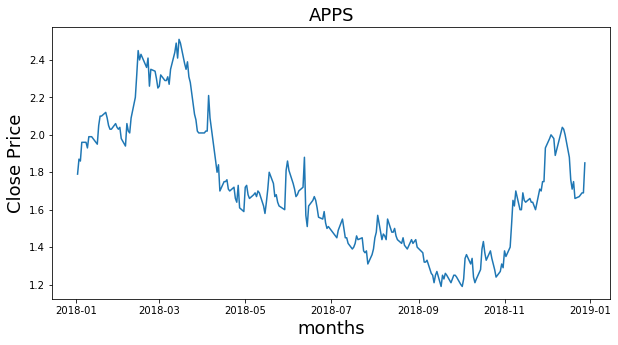

In [56]:
plt.figure(figsize = (10, 5))
plt.title('APPS', fontsize = 18)
plt.xlabel('months', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(df['Close'])
plt.show()

In [57]:
df = df[['Close']]
df.head()

Close
Date             
2018-01-02   1.79
2018-01-03   1.87
2018-01-04   1.86
2018-01-05   1.96
2018-01-08   1.96

In [58]:
future_days = 30

df['Prediction'] = df[['Close']].shift(-future_days)

df.tail(4)

Close  Prediction
Date                         
2018-12-24   1.67         NaN
2018-12-26   1.69         NaN
2018-12-27   1.69         NaN
2018-12-28   1.85         NaN

In [59]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[1.78999996]
 [1.87      ]
 [1.86000001]
 [1.96000004]
 [1.96000004]
 [1.92999995]
 [1.99000001]
 [1.99000001]
 [1.99000001]
 [1.95000005]
 [2.04999995]
 [2.0999999 ]
 [2.0999999 ]
 [2.11999989]
 [2.08999991]
 [2.04999995]
 [2.02999997]
 [2.02999997]
 [2.05999994]
 [2.03999996]
 [2.02999997]
 [2.03999996]
 [1.98000002]
 [1.94000006]
 [2.05999994]
 [2.01999998]
 [2.00999999]
 [2.08999991]
 [2.20000005]
 [2.31999993]
 [2.45000005]
 [2.4000001 ]
 [2.43000007]
 [2.3599999 ]
 [2.41000009]
 [2.25999999]
 [2.3499999 ]
 [2.33999991]
 [2.29999995]
 [2.25      ]
 [2.25999999]
 [2.31999993]
 [2.28999996]
 [2.28999996]
 [2.30999994]
 [2.26999998]
 [2.3499999 ]
 [2.44000006]
 [2.49000001]
 [2.41000009]
 [2.50999999]
 [2.49000001]
 [2.38000011]
 [2.3499999 ]
 [2.3900001 ]
 [2.30999994]
 [2.27999997]
 [2.1099999 ]
 [2.07999992]
 [2.01999998]
 [2.00999999]
 [2.00999999]
 [2.01999998]
 [2.01999998]
 [2.21000004]
 [2.08999991]
 [1.91999996]
 [1.86000001]
 [1.79999995]
 [1.84000003]
 [1.70000005]
 [1.75

In [60]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[2.45000005 2.4000001  2.43000007 2.3599999  2.41000009 2.25999999
 2.3499999  2.33999991 2.29999995 2.25       2.25999999 2.31999993
 2.28999996 2.28999996 2.30999994 2.26999998 2.3499999  2.44000006
 2.49000001 2.41000009 2.50999999 2.49000001 2.38000011 2.3499999
 2.3900001  2.30999994 2.27999997 2.1099999  2.07999992 2.01999998
 2.00999999 2.00999999 2.01999998 2.01999998 2.21000004 2.08999991
 1.91999996 1.86000001 1.79999995 1.84000003 1.70000005 1.75
 1.75       1.75999999 1.71000004 1.70000005 1.72000003 1.65999997
 1.63999999 1.73000002 1.61000001 1.59000003 1.72000003 1.73000002
 1.67999995 1.65999997 1.67999995 1.69000006 1.66999996 1.70000005
 1.69000006 1.62       1.58000004 1.63999999 1.71000004 1.79999995
 1.74000001 1.66999996 1.67999995 1.63999999 1.62       1.60000002
 1.80999994 1.86000001 1.80999994 1.74000001 1.71000004 1.66999996
 1.67999995 1.70000005 1.72000003 1.88       1.57000005 1.50999999
 1.62       1.64999998 1.66999996 1.64999998 1.61000001 1.55999994
 1

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .25)